In [785]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
# Import usual modules
import pandas as pd
import csv
import math
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import datetime
import re


In [493]:
os.getcwd()
#os.chdir("/Users/veesheen/Desktop")

'/Users/veesheenyuen/code/veeyuen/SAA'

In [4]:
events=pd.read_csv('all_events.csv')

events

,GENDER,EVENT,HEAT,NAME,BIRTH DATE,NAT.,MARK,Unnamed: 7
0,Men,High Jump,Combined,Janry UBAS,2-Jan-94,PHI,2.04,NaN
1,Men,High Jump,Combined,Suttisak SINGKHON,5-Oct-96,THA,1.95,NaN
2,Men,High Jump,Combined,Minh Sang LUONG,16-Feb-96,VIE,1.89,NaN
3,Men,High Jump,Combined,Aries TOLEDO,2-Nov-93,PHI,1.86,NaN
4,Men,High Jump,Combined,Van Su BUI,14-Apr-94,VIE,1.86,NaN
...,...,...,...,...,...,...,...,...
216,Women,Discus Throw,Final,Queenie Ting KUNG NI,16-Nov-97,MAS,52.36,NaN
217,Women,Discus Throw,Final,Choo KANG NI,9-Feb-94,MAS,46.57,NaN
218,Women,Discus Throw,Final,Thi Hong Thuong NGUYEN,25-May-97,VIE,45.70,NaN
219,Women,Discus Throw,Final,Jasmin PHUA,7-Dec-01,SGP,44.42,NaN


In [11]:
events

,GENDER,EVENT,HEAT,NAME,BIRTH DATE,NAT.,MARK,Unnamed: 7
0,Men,High Jump,Combined,Janry UBAS,2-Jan-94,PHI,2.04,NaN
1,Men,High Jump,Combined,Suttisak SINGKHON,5-Oct-96,THA,1.95,NaN
2,Men,High Jump,Combined,Minh Sang LUONG,16-Feb-96,VIE,1.89,NaN
3,Men,High Jump,Combined,Aries TOLEDO,2-Nov-93,PHI,1.86,NaN
4,Men,High Jump,Combined,Van Su BUI,14-Apr-94,VIE,1.86,NaN
...,...,...,...,...,...,...,...,...
216,Women,Discus Throw,Final,Queenie Ting KUNG NI,16-Nov-97,MAS,52.36,NaN
217,Women,Discus Throw,Final,Choo KANG NI,9-Feb-94,MAS,46.57,NaN
218,Women,Discus Throw,Final,Thi Hong Thuong NGUYEN,25-May-97,VIE,45.70,NaN
219,Women,Discus Throw,Final,Jasmin PHUA,7-Dec-01,SGP,44.42,NaN


In [5]:
events['MARK'] = pd.to_numeric(events['MARK'])

In [6]:
events['EVENT'].unique()

array(['High Jump', 'Long Jump', '200M', 'Hammer Throw', 'Javeln Throw',
       '400M', 'Discus Throw', '100M', 'Triple Jump'], dtype=object)

In [7]:
high_jump_men=events[(events['EVENT']=='High Jump') & (events['GENDER']=='Men')].copy()
high_jump_men

,GENDER,EVENT,HEAT,NAME,BIRTH DATE,NAT.,MARK,Unnamed: 7
0,Men,High Jump,Combined,Janry UBAS,2-Jan-94,PHI,2.04,NaN
1,Men,High Jump,Combined,Suttisak SINGKHON,5-Oct-96,THA,1.95,NaN
2,Men,High Jump,Combined,Minh Sang LUONG,16-Feb-96,VIE,1.89,NaN
3,Men,High Jump,Combined,Aries TOLEDO,2-Nov-93,PHI,1.86,NaN
4,Men,High Jump,Combined,Van Su BUI,14-Apr-94,VIE,1.86,NaN
5,Men,High Jump,Final,Kobsit SITTHICHAI,25-Jun-99,THA,2.21,NaN
6,Men,High Jump,Final,Nauraj Singh RANDHAWA,27-Jan-92,MAS,2.18,NaN
7,Men,High Jump,Final,Moh. Eizlan DAHALAN,5-Sep-99,MAS,2.18,NaN
8,Men,High Jump,Final,Tawan KAEWKAM,30-Sep-99,THA,2.18,NaN
9,Men,High Jump,Final,Duc Anh VU,6-Feb-98,VIE,2.18,NaN


/Users/veesheenyuen/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


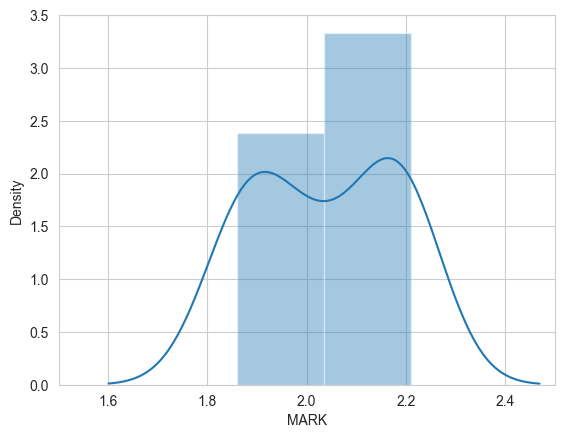

In [8]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(high_jump_men['MARK'], kde=True, ax=ax)
ax.set_xlim(1.5, 2.5)

plt.show()

In [55]:
high_jump_men['MARK'].describe()

count       12
unique       7
top       2.18
freq         4
Name: MARK, dtype: object

In [16]:
long_jump_men=events[(events['EVENT']=='Long Jump') & (events['GENDER']=='Men')].copy()
long_jump_men

,GENDER,EVENT,HEAT,NAME,BIRTH DATE,NAT.,MARK,Unnamed: 7
12,Men,Long Jump,Final,Tien Trong NGUYEN,9-Mar-97,VIE,7.80,NaN
13,Men,Long Jump,Final,Janry UBAS,2-Jan-94,PHI,7.73,NaN
14,Men,Long Jump,Final,. SAPWATURAHMAN,13-May-94,INA,7.61,NaN
15,Men,Long Jump,Final,Van Dien TRAN,27-Jan-98,VIE,7.46,NaN
16,Men,Long Jump,Final,Andre ANURA,12-Jun-99,MAS,7.24,NaN
17,Men,Long Jump,Final,Hoeun CHAV,20-Jan-02,CAM,6.72,NaN
18,Men,Long Jump,Final,Xaidavahn VONGSAVANH,8-Oct-00,LAO,6.27,NaN
19,Men,Long Jump,Combined,Janry UBAS,2-Jan-94,PHI,7.71,NaN
20,Men,Long Jump,Combined,Suttisak SINGKHON,5-Oct-96,THA,7.29,NaN
21,Men,Long Jump,Combined,Aries TOLEDO,2-Nov-93,PHI,7.22,NaN


In [17]:
long_jump_men.sort_values('MARK', ascending=True).drop_duplicates('NAME').sort_index()

,GENDER,EVENT,HEAT,NAME,BIRTH DATE,NAT.,MARK,Unnamed: 7
12,Men,Long Jump,Final,Tien Trong NGUYEN,9-Mar-97,VIE,7.80,NaN
14,Men,Long Jump,Final,. SAPWATURAHMAN,13-May-94,INA,7.61,NaN
15,Men,Long Jump,Final,Van Dien TRAN,27-Jan-98,VIE,7.46,NaN
16,Men,Long Jump,Final,Andre ANURA,12-Jun-99,MAS,7.24,NaN
17,Men,Long Jump,Final,Hoeun CHAV,20-Jan-02,CAM,6.72,NaN
18,Men,Long Jump,Final,Xaidavahn VONGSAVANH,8-Oct-00,LAO,6.27,NaN
19,Men,Long Jump,Combined,Janry UBAS,2-Jan-94,PHI,7.71,NaN
20,Men,Long Jump,Combined,Suttisak SINGKHON,5-Oct-96,THA,7.29,NaN
21,Men,Long Jump,Combined,Aries TOLEDO,2-Nov-93,PHI,7.22,NaN
22,Men,Long Jump,Combined,Minh Sang LUONG,16-Feb-96,VIE,6.62,NaN


In [18]:
long_jump_men.drop_duplicates(subset='NAME', keep='first')  # alternative drop logic

,GENDER,EVENT,HEAT,NAME,BIRTH DATE,NAT.,MARK,Unnamed: 7
12,Men,Long Jump,Final,Tien Trong NGUYEN,9-Mar-97,VIE,7.80,NaN
13,Men,Long Jump,Final,Janry UBAS,2-Jan-94,PHI,7.73,NaN
14,Men,Long Jump,Final,. SAPWATURAHMAN,13-May-94,INA,7.61,NaN
15,Men,Long Jump,Final,Van Dien TRAN,27-Jan-98,VIE,7.46,NaN
16,Men,Long Jump,Final,Andre ANURA,12-Jun-99,MAS,7.24,NaN
17,Men,Long Jump,Final,Hoeun CHAV,20-Jan-02,CAM,6.72,NaN
18,Men,Long Jump,Final,Xaidavahn VONGSAVANH,8-Oct-00,LAO,6.27,NaN
20,Men,Long Jump,Combined,Suttisak SINGKHON,5-Oct-96,THA,7.29,NaN
21,Men,Long Jump,Combined,Aries TOLEDO,2-Nov-93,PHI,7.22,NaN
22,Men,Long Jump,Combined,Minh Sang LUONG,16-Feb-96,VIE,6.62,NaN


/Users/veesheenyuen/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


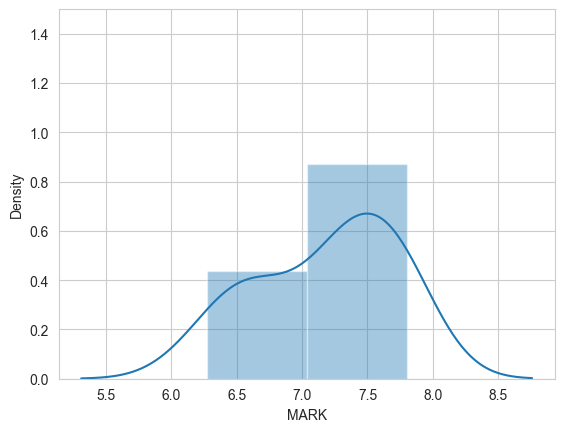

In [25]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(long_jump_men['MARK'], ax=ax)
#ax.set_xlim(0, 9)
ax.set_ylim(0, 1.5)
plt.show()

In [43]:
long_jump_men['MARK'].describe()

count      12
unique     12
top       7.8
freq        1
Name: MARK, dtype: object

<AxesSubplot:>

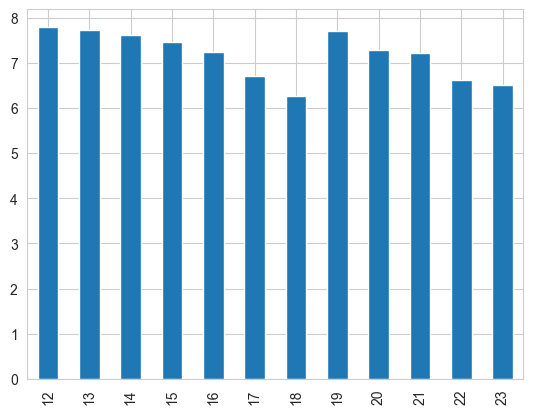

In [21]:
long_jump_men['MARK'].plot(kind='bar')

# Full dataset

In [1246]:
xls = pd.ExcelFile('ranking_master.xlsx')
df1 = pd.read_excel(xls, '2022')
df2 = pd.read_excel(xls, '2021')
df3 = pd.read_excel(xls, '2020')
df4 = pd.read_excel(xls, '2019')
df5 = pd.read_excel(xls, '2018')
df6 = pd.read_excel(xls, '2017')
df7 = pd.read_excel(xls, '2016')
df8 = pd.read_excel(xls, '2015')
df9 = pd.read_excel(xls, '2014')
df10 = pd.read_excel(xls, '2013')
df11 = pd.read_excel(xls, '2012')
df12 = pd.read_excel(xls, '2011')
df13 = pd.read_excel(xls, '2013')
df14 = pd.read_excel(xls, 'Before 2010')

In [1049]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8542 entries, 0 to 8541
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8542 non-null   datetime64[ns]
 1   Event         8542 non-null   object        
 2   Name          8542 non-null   object        
 3   Age           8542 non-null   object        
 4   Team          8541 non-null   object        
 5   Result        8542 non-null   object        
 6   m/s           8542 non-null   object        
 7   Competition   8542 non-null   object        
 8   Year D.O.B.   8542 non-null   object        
 9   Info, if any  8542 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 667.5+ KB


In [1166]:
def preprocess(i, string, metric):

    global output
    
    l=['discus', 'throw', 'jump', 'vault', 'shot']
        
    string=string.lower()    
    
    if any(s in string for s in l)==True:
    
        output=float(str(metric))
        
    else:
        
        searchstring = ":"
        searchstring2 = "."
        substring=str(metric)
        count = substring.count(searchstring)
        count2 = substring.count(searchstring2)
            
        if count==0:
            output=float(substring)
                        
             
        elif (type(metric)==datetime.time or type(metric)==datetime.datetime):
                                                
            time=str(metric)
            h, m ,s = time.split(':')
            output = float(datetime.timedelta(hours=int(h),minutes=int(m),seconds=float(s)).total_seconds())
            
                                
        elif (count==1 and count2==1):
            
            m,s = metric.split(':')
            output = float(datetime.timedelta(minutes=int(m),seconds=float(s)).total_seconds())
            
            if output==229.90:
                print(metric, m, s, output, 'here')

                     
        elif (count==1 and count2==2):
            
            metric = metric.replace(".", ":", 1)
            
            h,m,s = metric.split(':')            
            output = float(datetime.timedelta(hours=int(h),minutes=int(m),seconds=float(s)).total_seconds())
                
        
        elif (count==2 and count2==0):
            
            h,m,s = metric.split(':')
            output = float(datetime.timedelta(hours=int(h),minutes=int(m),seconds=float(s)).total_seconds())
            
                
    return output

In [503]:
df1

,Unnamed: 0,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Date of Birth (PDPA),Unnamed: 12
0,NaN,2022-01-22,Women Long Jump,"Rozario, Tia Louise",22,Princeton,5.62,Indoor,International - Wesley Brown invitational,2000,"3pos, sanctioned",-,NaN
1,NaN,2022-01-15,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR,-,NaN
2,NaN,2022-01-15,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-,-,NaN
3,NaN,2022-01-15,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-,-,NaN
4,NaN,2022-01-15,Men 110 Meter Hurdles (0.914m),"MOHAMAD AFZAL, Bin Mohamad Zin",17,Singapore Sports Sc,14.97,1.6,Local - Club Zoom,2005,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9134,NaN,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"YEO, BRANDON",21,NATIONAL UNIVERSITY SINGAPORE,12:25.52,-,SA - 3rd All Comers,2001,-,-,NaN
9135,NaN,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"LEE, KELVIN",23,SINGAPORE INSTITUTE OF MANAGEM,13:38.24,-,SA - 3rd All Comers,1999,-,-,NaN
9136,NaN,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"EAR, HONG RAY",17,TEAMFABIAN,14:01.31,-,SA - 3rd All Comers,2005,-,-,NaN
9137,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEXT UPLOAD


In [124]:
def format_result(result):
    date = datetime.datetime.utcfromtimestamp(result)
    output = datetime.datetime.strftime(date, "%M:%S:%f")
    return output

format_result(32.25)

'00:32:250000'

In [44]:
from datetime import timedelta
def format_result(result):
    seconds = int(result)
    microseconds = (result * 1000000) % 1000000
    output = timedelta(0, seconds, microseconds)
    return output

format_result(131.39)

datetime.timedelta(seconds=131, microseconds=390000)

In [45]:
t = '15:30.45'
m,s = t.split(':')
print(float(datetime.timedelta(minutes=int(m),seconds=float(s)).total_seconds()))

930.45


In [ ]:
time = "02:01:09"
date_time = datetime.datetime.strptime(time, "%H:%M:%S")
a_timedelta = date_time - datetime.datetime(1900, 1, 1)
seconds = a_timedelta.total_seconds()

print(date_time)

# 2022 df1

In [1247]:
df1 = df1[df1['Event'].notna()] # take only non-empty rows
df1 = df1.reset_index() # must reset index after filtering

In [1248]:
df1.drop(['Unnamed: 0', 'Unnamed: 12', 'Date of Birth (PDPA)'],axis=1, inplace=True)

In [1249]:
df1

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2022-01-22,Women Long Jump,"Rozario, Tia Louise",22,Princeton,5.62,Indoor,International - Wesley Brown invitational,2000,"3pos, sanctioned"
1,1,2022-01-15,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR
2,2,2022-01-15,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-
3,3,2022-01-15,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-
4,4,2022-01-15,Men 110 Meter Hurdles (0.914m),"MOHAMAD AFZAL, Bin Mohamad Zin",17,Singapore Sports Sc,14.97,1.6,Local - Club Zoom,2005,-
...,...,...,...,...,...,...,...,...,...,...,...
9131,9133,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"TAN, DARREN",21,SINGAPORE INSTITUTE OF MANAGEM,11:16.54,-,SA - 3rd All Comers,2001,-
9132,9134,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"YEO, BRANDON",21,NATIONAL UNIVERSITY SINGAPORE,12:25.52,-,SA - 3rd All Comers,2001,-
9133,9135,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"LEE, KELVIN",23,SINGAPORE INSTITUTE OF MANAGEM,13:38.24,-,SA - 3rd All Comers,1999,-
9134,9136,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"EAR, HONG RAY",17,TEAMFABIAN,14:01.31,-,SA - 3rd All Comers,2005,-


In [1250]:
for i in range(len(df1)):
        
    rowIndex = df1.index[i]

    input_string=df1.iloc[rowIndex,2]
    metric=df1.iloc[rowIndex,6]
        
    out = preprocess(i, input_string, metric)
     
    df1.loc[rowIndex, 'Metric'] = out

In [1251]:
df1

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2022-01-22,Women Long Jump,"Rozario, Tia Louise",22,Princeton,5.62,Indoor,International - Wesley Brown invitational,2000,"3pos, sanctioned",5.62
1,1,2022-01-15,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR,14.16
2,2,2022-01-15,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-,14.55
3,3,2022-01-15,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-,14.77
4,4,2022-01-15,Men 110 Meter Hurdles (0.914m),"MOHAMAD AFZAL, Bin Mohamad Zin",17,Singapore Sports Sc,14.97,1.6,Local - Club Zoom,2005,-,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...
9131,9133,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"TAN, DARREN",21,SINGAPORE INSTITUTE OF MANAGEM,11:16.54,-,SA - 3rd All Comers,2001,-,676.54
9132,9134,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"YEO, BRANDON",21,NATIONAL UNIVERSITY SINGAPORE,12:25.52,-,SA - 3rd All Comers,2001,-,745.52
9133,9135,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"LEE, KELVIN",23,SINGAPORE INSTITUTE OF MANAGEM,13:38.24,-,SA - 3rd All Comers,1999,-,818.24
9134,9136,2022-12-11,Men 3000 Meter Steeplechase (0.914m),"EAR, HONG RAY",17,TEAMFABIAN,14:01.31,-,SA - 3rd All Comers,2005,-,841.31


In [1252]:
women_long_jump=df1[(df1['Event']=='Women Long Jump')].copy()

/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


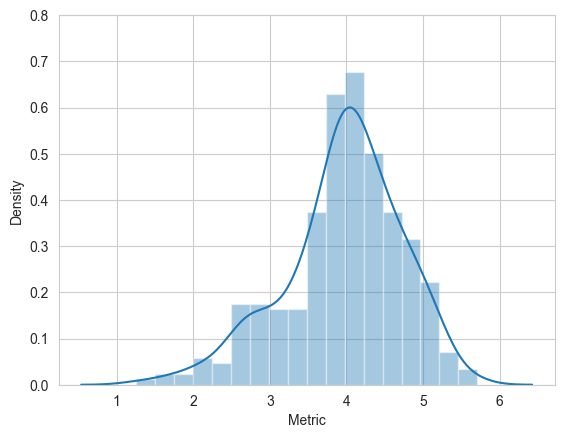

In [1253]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(women_long_jump['Metric'], ax=ax)
#ax.set_xlim(0, 9)
ax.set_ylim(0, 0.8)
plt.show()

In [1254]:
men_steeple_3000m=df1[(df1['Event']=='Men 3000 Meter Steeplechase (0.914m)')].copy()

In [1255]:
men_steeple_3000m

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
1345,1345,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"ONG, Chilton",-,NTU,10:27.41,-,Local - IVP,-,-,627.41
1346,1346,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"CHENG, Daniel",-,NUS,10:48.67,-,Local - IVP,-,-,648.67
1347,1347,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"RAMANATHAN, Rajesh Muthu",-,NUS,11:11.19,-,Local - IVP,-,-,671.19
1348,1348,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"KO, Keane",-,NYP,11:19.15,-,Local - IVP,-,-,679.15
1349,1349,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"KULANDAIVELUDAYAR SENTHILKUMAR, Ga",-,NP,11:32.63,-,Local - IVP,-,-,692.63
1350,1350,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"AMOS SAW, Cheng You",-,SIM,13:07.85,-,Local - IVP,-,-,787.85
1351,1351,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"KUMAR, Saran",-,NYP,13:31.40,-,Local - IVP,-,-,811.40
1352,1352,2022-03-26,Men 3000 Meter Steeplechase (0.914m),"ANG, Leonard",-,SP,13:52.31,-,Local - IVP,-,-,832.31
1983,1983,2022-02-20,Men 3000 Meter Steeplechase (0.914m),"SENTHILKUMAR GAUTAM, KULANDAIVELUDAYAR",18,Trackstar Athletics,9:49.12,-,SA - 1st All Comers,2004,-,589.12
1984,1984,2022-02-20,Men 3000 Meter Steeplechase (0.914m),"WEI FENG, LIM",18,Trackstar Athletics,9:50.52,-,SA - 1st All Comers,2004,-,590.52


/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


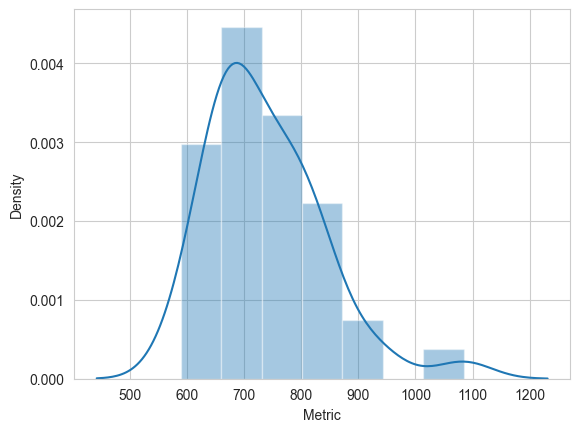

In [1256]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(men_steeple_3000m['Metric'], ax=ax)
#ax.set_xlim(0, 9)
#ax.set_ylim(0, 1.5)
plt.show()

# 2021 df2

In [1257]:
df2 = df2[df2['Event'].notna()] # take only non-empty rows
df2 = df2.reset_index() # must reset index after filtering

In [1258]:
df2.drop(['Unnamed: 0', 'Unnamed: 12', 'Date of Birth (PDPA)'],axis=1, inplace=True)

In [1259]:
df2

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2021-01-23 00:00:00,Men Pole Vault,"Koh, Wei Shien",26,National University of Singapo,4,-,SA - Performance Trial 1,1995,"Event 101, Open"
1,1,2021-01-23 00:00:00,Women Discus Throw (1kg),"Phua, Jasmin",20,National University of Singapo,40.31,-,SA - Performance Trial 1,2001,"Event 102, Open"
2,2,2021-01-23 00:00:00,Women Discus Throw (1kg),"Teo, Kai Ting",20,National University of Singapo,24.79,-,SA - Performance Trial 1,2001,"Event 102, Open"
3,3,2021-01-23 00:00:00,Men Discus Throw (2kg),"Yee, Eric",22,National University of Singapo,46.41,-,SA - Performance Trial 1,1999,"Event 103, Open"
4,4,2021-01-23 00:00:00,Men Discus Throw (2kg),"See, Brian",25,National University of Singapo,45.94,-,SA - Performance Trial 1,1996,"Event 103, Open"
...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,2021-12-11 00:00:00,Men Long Jump,Tan Daryl,20,TCT,6.07,0,Local - Club Zoom,2001,-
3906,3906,2021-12-11 00:00:00,Men Long Jump,Low Patrick,22,NTU,5.51,0.3,Local - Club Zoom,1999,-
3907,3907,2021-12-11 00:00:00,Men Long Jump,Chen Ke Yuan,21,NTU,5.43,0,Local - Club Zoom,2000,-
3908,3908,2021-12-11 00:00:00,Men Long Jump,Hussen Muhammad Aqil,24,WAC,5.4,1.4,Local - Club Zoom,1997,-


In [1260]:
for i in range(len(df2)):

    try:
        rowIndex = df2.index[i]

        input_string=df2.iloc[rowIndex,2]
        metric=df2.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df2.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with value", metric)
        print("Exiting operation")
        break
        
        

In [1261]:
df2

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2021-01-23 00:00:00,Men Pole Vault,"Koh, Wei Shien",26,National University of Singapo,4,-,SA - Performance Trial 1,1995,"Event 101, Open",4.00
1,1,2021-01-23 00:00:00,Women Discus Throw (1kg),"Phua, Jasmin",20,National University of Singapo,40.31,-,SA - Performance Trial 1,2001,"Event 102, Open",40.31
2,2,2021-01-23 00:00:00,Women Discus Throw (1kg),"Teo, Kai Ting",20,National University of Singapo,24.79,-,SA - Performance Trial 1,2001,"Event 102, Open",24.79
3,3,2021-01-23 00:00:00,Men Discus Throw (2kg),"Yee, Eric",22,National University of Singapo,46.41,-,SA - Performance Trial 1,1999,"Event 103, Open",46.41
4,4,2021-01-23 00:00:00,Men Discus Throw (2kg),"See, Brian",25,National University of Singapo,45.94,-,SA - Performance Trial 1,1996,"Event 103, Open",45.94
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,2021-12-11 00:00:00,Men Long Jump,Tan Daryl,20,TCT,6.07,0,Local - Club Zoom,2001,-,6.07
3906,3906,2021-12-11 00:00:00,Men Long Jump,Low Patrick,22,NTU,5.51,0.3,Local - Club Zoom,1999,-,5.51
3907,3907,2021-12-11 00:00:00,Men Long Jump,Chen Ke Yuan,21,NTU,5.43,0,Local - Club Zoom,2000,-,5.43
3908,3908,2021-12-11 00:00:00,Men Long Jump,Hussen Muhammad Aqil,24,WAC,5.4,1.4,Local - Club Zoom,1997,-,5.40


In [1262]:
df2.iloc[3391, :]

index                                            3391
Date                              2021-11-21 00:00:00
Event                           Women 5 Kilometer Run
Name                                   Goh, Chui Ling
Age                                                29
Team                                       Individual
Result                                       00:36:28
m/s                                                HT
Competition     International - 41e Foulee Venissiane
Year D.O.B.                                      1992
Info, if any    SB PB NB, Road Race, Sanctioned,13pos
Metric                                         2188.0
Name: 3391, dtype: object

In [1263]:
women_600m_run=df2[(df2['Event']=='Women 600 Meter Run')].copy()

/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


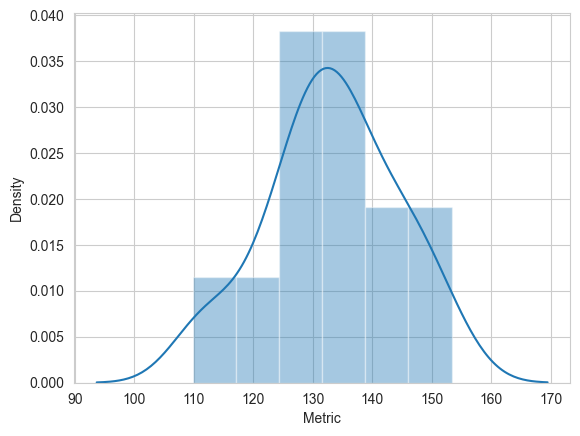

In [1264]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(women_600m_run['Metric'], ax=ax)
#ax.set_xlim(0, 9)
#ax.set_ylim(0, 1.5)
plt.show()

In [1265]:
women_100m_dash=df2[(df2['Event']=='Women 100 Meter Dash')].copy()

In [1266]:
women_100m_dash.describe()

,index,Metric
count,221.000000,221.000000
mean,1413.380090,14.626652
std,1096.928982,1.806514
min,8.000000,12.100000
25%,401.000000,13.570000
50%,981.000000,14.330000
75%,1909.000000,15.120000
max,3799.000000,25.690000


/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


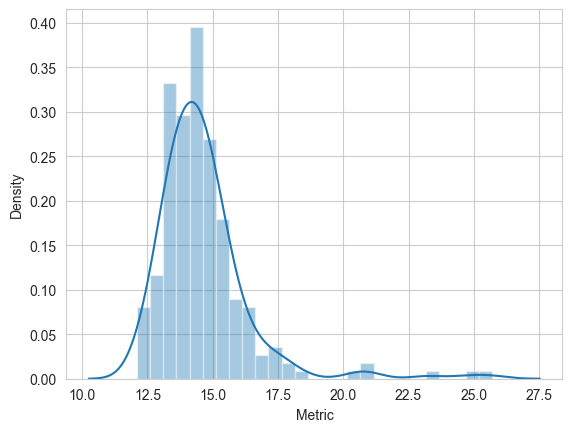

In [1267]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(women_100m_dash['Metric'], ax=ax)
#ax.set_xlim(0, 9)
#ax.set_ylim(0, 1.5)
plt.show()

# 2020 df3

In [1268]:
df3

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Date of Birth (PDPA),Unnamed: 11
0,2020-01-11,Women Long Jump,"Rozario, Tia Louise",20,Princeton,5.26,Indoor,International - Navy v. Princeton Dual Track &...,2000,"5pos, sanctioned",-,NaN
1,2020-01-11,Men 400 Meter Dash,Zubin Muncherji,23,Indiana University,49.36,Indoor,International - Indiana v Tennessee Duals,1997,"6pos final, sanctioned",-,NaN
2,2020-01-17,Men 400 Meter Dash,Zubin Muncherji,23,Indiana University,49.13,Indoor,International - Vanderbilt Invitational,1997,"13pos final, sanctioned",-,NaN
3,2020-01-17,Women 60 Meter Hurdles (0.838m),"Nur Izlyn, Zaini",22,Georgia Southern,9,Indoor,International - Gamecock Opener,1998,"24pos final, sanctioned",-,NaN
4,2020-01-18,Women 60 Meter Dash,"Nur Izlyn, Zaini",22,Georgia Southern,8,Indoor,International - Gamecock Opener,1998,"21pos prelim, sanctioned",-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2020-12-13,Women 400 Meter Dash,"Patil, Tanisha",15,Maxform,59.37,-,SA - Performance Trial 2,2005,2pos,-,NaN
1164,2020-12-13,Women 1500 Meter Run,"Goh, Chui Ling",29,Flash Athletics Club,4:44.09,-,SA - Performance Trial 2,1991,1pos,-,NaN
1165,2020-12-13,Women 1500 Meter Run,"Yap, Joyceleen",20,National University Singapore,5:15.40,-,SA - Performance Trial 2,2000,2pos,-,NaN
1166,2020-12-13,Women 1500 Meter Run,"Yuen Yu, Lee",20,Singapore Institute of Technol,5:35.51,-,SA - Performance Trial 2,2000,3pos,-,NaN


In [1269]:
df3 = df3[df3['Event'].notna()] # take only non-empty rows
df3 = df3.reset_index() # must reset index after filtering

In [1270]:
df3.drop(['Unnamed: 11', 'Date of Birth (PDPA)'],axis=1, inplace=True)

In [1271]:
df3

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2020-01-11,Women Long Jump,"Rozario, Tia Louise",20,Princeton,5.26,Indoor,International - Navy v. Princeton Dual Track &...,2000,"5pos, sanctioned"
1,1,2020-01-11,Men 400 Meter Dash,Zubin Muncherji,23,Indiana University,49.36,Indoor,International - Indiana v Tennessee Duals,1997,"6pos final, sanctioned"
2,2,2020-01-17,Men 400 Meter Dash,Zubin Muncherji,23,Indiana University,49.13,Indoor,International - Vanderbilt Invitational,1997,"13pos final, sanctioned"
3,3,2020-01-17,Women 60 Meter Hurdles (0.838m),"Nur Izlyn, Zaini",22,Georgia Southern,9,Indoor,International - Gamecock Opener,1998,"24pos final, sanctioned"
4,4,2020-01-18,Women 60 Meter Dash,"Nur Izlyn, Zaini",22,Georgia Southern,8,Indoor,International - Gamecock Opener,1998,"21pos prelim, sanctioned"
...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,2020-12-13,Women 400 Meter Dash,"Patil, Tanisha",15,Maxform,59.37,-,SA - Performance Trial 2,2005,2pos
1164,1164,2020-12-13,Women 1500 Meter Run,"Goh, Chui Ling",29,Flash Athletics Club,4:44.09,-,SA - Performance Trial 2,1991,1pos
1165,1165,2020-12-13,Women 1500 Meter Run,"Yap, Joyceleen",20,National University Singapore,5:15.40,-,SA - Performance Trial 2,2000,2pos
1166,1166,2020-12-13,Women 1500 Meter Run,"Yuen Yu, Lee",20,Singapore Institute of Technol,5:35.51,-,SA - Performance Trial 2,2000,3pos


In [1272]:
for i in range(len(df3)):

    try:
        rowIndex = df3.index[i]

        input_string = df3.iloc[rowIndex, 2]
        metric = df3.iloc[rowIndex, 6]

        out = preprocess(i, input_string, metric)

        df3.loc[rowIndex, 'Metric'] = out

    except:

        print("Unknown input format encountered at row", i, "with value",
              metric)
        print("Exiting operation")
        break
        


In [1273]:
df3

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2020-01-11,Women Long Jump,"Rozario, Tia Louise",20,Princeton,5.26,Indoor,International - Navy v. Princeton Dual Track &...,2000,"5pos, sanctioned",5.26
1,1,2020-01-11,Men 400 Meter Dash,Zubin Muncherji,23,Indiana University,49.36,Indoor,International - Indiana v Tennessee Duals,1997,"6pos final, sanctioned",49.36
2,2,2020-01-17,Men 400 Meter Dash,Zubin Muncherji,23,Indiana University,49.13,Indoor,International - Vanderbilt Invitational,1997,"13pos final, sanctioned",49.13
3,3,2020-01-17,Women 60 Meter Hurdles (0.838m),"Nur Izlyn, Zaini",22,Georgia Southern,9,Indoor,International - Gamecock Opener,1998,"24pos final, sanctioned",9.00
4,4,2020-01-18,Women 60 Meter Dash,"Nur Izlyn, Zaini",22,Georgia Southern,8,Indoor,International - Gamecock Opener,1998,"21pos prelim, sanctioned",8.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,2020-12-13,Women 400 Meter Dash,"Patil, Tanisha",15,Maxform,59.37,-,SA - Performance Trial 2,2005,2pos,59.37
1164,1164,2020-12-13,Women 1500 Meter Run,"Goh, Chui Ling",29,Flash Athletics Club,4:44.09,-,SA - Performance Trial 2,1991,1pos,284.09
1165,1165,2020-12-13,Women 1500 Meter Run,"Yap, Joyceleen",20,National University Singapore,5:15.40,-,SA - Performance Trial 2,2000,2pos,315.40
1166,1166,2020-12-13,Women 1500 Meter Run,"Yuen Yu, Lee",20,Singapore Institute of Technol,5:35.51,-,SA - Performance Trial 2,2000,3pos,335.51


# 2019 df4

In [1274]:
df4

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Unnamed: 10,Unnamed: 11
0,2019-01-01,Men 5 Kilometer Race Walk,Zuosheng Jean Yeo,18,Individual,00:52:03,-,International - The First Walk,2001,Held in HK,-,-
1,2019-01-12,Men 10000 Meter Race Walk,"Back, Peter James",53,Red Hawk Sports Club,1:10:47.16,-,SA - Age-Group Race Walking Competition,1966,Open,-,-
2,2019-01-12,Men 10000 Meter Race Walk,"Boon Huat, Lim",47,Red Hawk Sports Club,1:14:47.04,-,SA - Age-Group Race Walking Competition,1972,Open,-,-
3,2019-01-12,Women 5000 Meter Race Walk,"Ying, Eleanor",18,Hwa Chong Institution,32:02.40,-,SA - Age-Group Race Walking Competition,2001,U20,-,-
4,2019-01-12,Women 5000 Meter Race Walk,"Whang, Chia Ning",18,Hwa Chong Institution,36:24.98,-,SA - Age-Group Race Walking Competition,2001,U20,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...
15022,2019-03-29,Men 4x400 Meter Relay,ANG JUN KAI PRESTON,-,CH,4:00.05,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",-,-
15023,2019-03-29,Men 4x400 Meter Relay,BRYAN CHEUNG JIA JIE,-,ACS(I),4:00.27,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",-,-
15024,2019-03-29,Men 4x400 Meter Relay,ADRIEL KUA BENG LEONG,-,MSH,4:00.93,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",-,-
15025,2019-03-29,Men 4x400 Meter Relay,ADAM MUKHAIR BIN AZLAN,-,SJI,4:01.62,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",-,-


In [1275]:
df4 = df4[df4['Event'].notna()] # take only non-empty rows
df4 = df4.reset_index(drop=True) # must reset index after filtering

In [1276]:
df4.drop(['Unnamed: 10', 'Unnamed: 11'],axis=1, inplace=True)

In [1277]:
df4

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2019-01-01,Men 5 Kilometer Race Walk,Zuosheng Jean Yeo,18,Individual,00:52:03,-,International - The First Walk,2001,Held in HK
1,2019-01-12,Men 10000 Meter Race Walk,"Back, Peter James",53,Red Hawk Sports Club,1:10:47.16,-,SA - Age-Group Race Walking Competition,1966,Open
2,2019-01-12,Men 10000 Meter Race Walk,"Boon Huat, Lim",47,Red Hawk Sports Club,1:14:47.04,-,SA - Age-Group Race Walking Competition,1972,Open
3,2019-01-12,Women 5000 Meter Race Walk,"Ying, Eleanor",18,Hwa Chong Institution,32:02.40,-,SA - Age-Group Race Walking Competition,2001,U20
4,2019-01-12,Women 5000 Meter Race Walk,"Whang, Chia Ning",18,Hwa Chong Institution,36:24.98,-,SA - Age-Group Race Walking Competition,2001,U20
...,...,...,...,...,...,...,...,...,...,...
15022,2019-03-29,Men 4x400 Meter Relay,ANG JUN KAI PRESTON,-,CH,4:00.05,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS"
15023,2019-03-29,Men 4x400 Meter Relay,BRYAN CHEUNG JIA JIE,-,ACS(I),4:00.27,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS"
15024,2019-03-29,Men 4x400 Meter Relay,ADRIEL KUA BENG LEONG,-,MSH,4:00.93,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS"
15025,2019-03-29,Men 4x400 Meter Relay,ADAM MUKHAIR BIN AZLAN,-,SJI,4:01.62,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS"


In [1278]:
for i in range(len(df4)):

    try:
        rowIndex = df4.index[i]

        input_string=df4.iloc[rowIndex,1]
        metric=df4.iloc[rowIndex,5]
        
        out = preprocess(i, input_string, metric)
                    
        df4.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with value", metric)
        print("Exiting operation")
        break


3:49.90 3 49.90 229.9 here


In [1279]:
df4

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,2019-01-01,Men 5 Kilometer Race Walk,Zuosheng Jean Yeo,18,Individual,00:52:03,-,International - The First Walk,2001,Held in HK,3123.00
1,2019-01-12,Men 10000 Meter Race Walk,"Back, Peter James",53,Red Hawk Sports Club,1:10:47.16,-,SA - Age-Group Race Walking Competition,1966,Open,3123.00
2,2019-01-12,Men 10000 Meter Race Walk,"Boon Huat, Lim",47,Red Hawk Sports Club,1:14:47.04,-,SA - Age-Group Race Walking Competition,1972,Open,3123.00
3,2019-01-12,Women 5000 Meter Race Walk,"Ying, Eleanor",18,Hwa Chong Institution,32:02.40,-,SA - Age-Group Race Walking Competition,2001,U20,1922.40
4,2019-01-12,Women 5000 Meter Race Walk,"Whang, Chia Ning",18,Hwa Chong Institution,36:24.98,-,SA - Age-Group Race Walking Competition,2001,U20,2184.98
...,...,...,...,...,...,...,...,...,...,...,...
15022,2019-03-29,Men 4x400 Meter Relay,ANG JUN KAI PRESTON,-,CH,4:00.05,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",240.05
15023,2019-03-29,Men 4x400 Meter Relay,BRYAN CHEUNG JIA JIE,-,ACS(I),4:00.27,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",240.27
15024,2019-03-29,Men 4x400 Meter Relay,ADRIEL KUA BENG LEONG,-,MSH,4:00.93,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",240.93
15025,2019-03-29,Men 4x400 Meter Relay,ADAM MUKHAIR BIN AZLAN,-,SJI,4:01.62,-,Local - National Schools,-,"Session 1519, Final, U15, C DIVISION BOYS",241.62


In [1280]:
women_100m_dash_2019=df4[(df4['Event']=='Women 100 Meter Dash')].copy()

In [1281]:
women_100m_dash_2019

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
82,2019-01-05,Women 100 Meter Dash,"Ortega, Samantha Theresa",14,SINGAPORE SPORTS SCHOOL,13.4,-2.1,SA - School Meet Episode 1,2005,C Div,13.40
83,2019-01-05,Women 100 Meter Dash,"., Zhong Chu Han",14,NANYANG GIRLS HIGH SCHOOL,13.94,0,SA - School Meet Episode 1,2005,C Div,13.94
84,2019-01-05,Women 100 Meter Dash,"Alethea Gledhill, Gabrielle",14,CEDAR GIRLS SECONDARY SCHOOL,14.3,0.1,SA - School Meet Episode 1,2005,C Div,14.30
85,2019-01-05,Women 100 Meter Dash,"SI Teng, Laura Wong",14,CHIJ ST. NICHOLAS GIRLS',14.34,-0.9,SA - School Meet Episode 1,2005,C Div,14.34
86,2019-01-05,Women 100 Meter Dash,"YI Han, Ashley, Tan",14,CEDAR GIRLS SECONDARY SCHOOL,14.54,-0.9,SA - School Meet Episode 1,2005,C Div,14.54
...,...,...,...,...,...,...,...,...,...,...,...
14872,2019-03-29,Women 100 Meter Dash,CAMILLE ALIX DAMAS,18,ACS(INT),13.12,0.2,Local - National Schools,2001,"Session 1504, Final, U21, A DIVISION GIRLS",13.12
14873,2019-03-29,Women 100 Meter Dash,ASHLEIGH SONIA HAZRA,18,SAJC,13.13,0.2,Local - National Schools,2001,"Session 1504, Final, U21, A DIVISION GIRLS",13.13
14874,2019-03-29,Women 100 Meter Dash,LIM XIN YU CLARISSA,18,NJC,13.14,0.2,Local - National Schools,2001,"Session 1504, Final, U21, A DIVISION GIRLS",13.14
14875,2019-03-29,Women 100 Meter Dash,LIN PEIQIN,18,VJC,13.41,0.2,Local - National Schools,2001,"Session 1504, Final, U21, A DIVISION GIRLS",13.41


# 2018 df5

In [1282]:
df5

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2018-01-14,Men Triple Jump,"Azhar, Arfan Bin",17,SINGAPORE SPORTS SCHOOL,13.38,0,SA - Series 1,2001,-
1,2018-01-14,Men Triple Jump,"Medina, Andrew George",16,SINGAPORE SPORTS SCHOOL,13.08,-1.1,SA - Series 1,2002,-
2,2018-01-14,Men Triple Jump,"Wong, U Fai Dylan",20,SINGAPORE SPORTS SCHOOL,12.56,-1.8,SA - Series 1,1998,-
3,2018-01-14,Men Triple Jump,"Lim, Yan Hng Chervin",17,NATIONAL JUNIOR COLLEGE,11.55,-0.9,SA - Series 1,2001,-
4,2018-01-14,Men Triple Jump,"Teo, Wei Sheng Xavier",18,ACSI,11.03,-2.1,SA - Series 1,2000,-
...,...,...,...,...,...,...,...,...,...,...
15223,2018-11-24,Men 4x400 Meter Relay,NANYANG POLYTECHNIC,-,NANYANG POLYTECHNIC,3:35.73,-,Local - POL-ITE,-,-
15224,2018-11-24,Men 4x400 Meter Relay,NGEE ANN POLYTECHNIC,-,NGEE ANN POLYTECHNIC,3:37.84,-,Local - POL-ITE,-,-
15225,2018-11-24,Men 4x400 Meter Relay,SINGAPORE POLYTECHNIC,-,SINGAPORE POLYTECHNIC,3:41.31,-,Local - POL-ITE,-,-
15226,2018-11-24,Men 4x400 Meter Relay,REPUBLIC POLYTECHNIC,-,REPUBLIC POLYTECHNIC,3:41.60,-,Local - POL-ITE,-,-


In [1283]:
df5 = df5[df5['Event'].notna()] # take only non-empty rows

In [1284]:
df5

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2018-01-14,Men Triple Jump,"Azhar, Arfan Bin",17,SINGAPORE SPORTS SCHOOL,13.38,0,SA - Series 1,2001,-
1,2018-01-14,Men Triple Jump,"Medina, Andrew George",16,SINGAPORE SPORTS SCHOOL,13.08,-1.1,SA - Series 1,2002,-
2,2018-01-14,Men Triple Jump,"Wong, U Fai Dylan",20,SINGAPORE SPORTS SCHOOL,12.56,-1.8,SA - Series 1,1998,-
3,2018-01-14,Men Triple Jump,"Lim, Yan Hng Chervin",17,NATIONAL JUNIOR COLLEGE,11.55,-0.9,SA - Series 1,2001,-
4,2018-01-14,Men Triple Jump,"Teo, Wei Sheng Xavier",18,ACSI,11.03,-2.1,SA - Series 1,2000,-
...,...,...,...,...,...,...,...,...,...,...
15223,2018-11-24,Men 4x400 Meter Relay,NANYANG POLYTECHNIC,-,NANYANG POLYTECHNIC,3:35.73,-,Local - POL-ITE,-,-
15224,2018-11-24,Men 4x400 Meter Relay,NGEE ANN POLYTECHNIC,-,NGEE ANN POLYTECHNIC,3:37.84,-,Local - POL-ITE,-,-
15225,2018-11-24,Men 4x400 Meter Relay,SINGAPORE POLYTECHNIC,-,SINGAPORE POLYTECHNIC,3:41.31,-,Local - POL-ITE,-,-
15226,2018-11-24,Men 4x400 Meter Relay,REPUBLIC POLYTECHNIC,-,REPUBLIC POLYTECHNIC,3:41.60,-,Local - POL-ITE,-,-


In [1285]:
df5.drop(df5[df5['Result'] == 'DNS'].index, inplace = True)
df5 = df5.reset_index() # must reset index after filtering

In [1286]:
for i in range(len(df5)):

    try:
        
        rowIndex = df5.index[i]

        input_string=df5.iloc[rowIndex,2]
        metric=df5.iloc[rowIndex,6]
                                
        out = preprocess(i, input_string, metric)
    
        df5.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1287]:
df5

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2018-01-14,Men Triple Jump,"Azhar, Arfan Bin",17,SINGAPORE SPORTS SCHOOL,13.38,0,SA - Series 1,2001,-,13.38
1,1,2018-01-14,Men Triple Jump,"Medina, Andrew George",16,SINGAPORE SPORTS SCHOOL,13.08,-1.1,SA - Series 1,2002,-,13.08
2,2,2018-01-14,Men Triple Jump,"Wong, U Fai Dylan",20,SINGAPORE SPORTS SCHOOL,12.56,-1.8,SA - Series 1,1998,-,12.56
3,3,2018-01-14,Men Triple Jump,"Lim, Yan Hng Chervin",17,NATIONAL JUNIOR COLLEGE,11.55,-0.9,SA - Series 1,2001,-,11.55
4,4,2018-01-14,Men Triple Jump,"Teo, Wei Sheng Xavier",18,ACSI,11.03,-2.1,SA - Series 1,2000,-,11.03
...,...,...,...,...,...,...,...,...,...,...,...,...
15222,15223,2018-11-24,Men 4x400 Meter Relay,NANYANG POLYTECHNIC,-,NANYANG POLYTECHNIC,3:35.73,-,Local - POL-ITE,-,-,215.73
15223,15224,2018-11-24,Men 4x400 Meter Relay,NGEE ANN POLYTECHNIC,-,NGEE ANN POLYTECHNIC,3:37.84,-,Local - POL-ITE,-,-,217.84
15224,15225,2018-11-24,Men 4x400 Meter Relay,SINGAPORE POLYTECHNIC,-,SINGAPORE POLYTECHNIC,3:41.31,-,Local - POL-ITE,-,-,221.31
15225,15226,2018-11-24,Men 4x400 Meter Relay,REPUBLIC POLYTECHNIC,-,REPUBLIC POLYTECHNIC,3:41.60,-,Local - POL-ITE,-,-,221.60


# 2017 df6

In [1288]:
df6

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2017-03-19,Men 60 Meter Dash,Lawrence Wee,-,Singapore,7.62,Indoor,International - World Masters Athletics Indoor...,-,-
1,2017-03-19,Men 60 Meter Dash,Richard Mather,-,Singapore,7.66,Indoor,International - World Masters Athletics Indoor...,-,-
2,2017-03-19,Men 60 Meter Dash,Tan Yew Yong,-,Singapore,7.77,Indoor,International - World Masters Athletics Indoor...,-,-
3,2017-03-19,Men 60 Meter Dash,Radwan Jaafar,-,Singapore,7.84,Indoor,International - World Masters Athletics Indoor...,-,-
4,2017-03-19,Men 60 Meter Dash,Chin Khen Theen,-,Singapore,7.89,Indoor,International - World Masters Athletics Indoor...,-,-
...,...,...,...,...,...,...,...,...,...,...
13559,2017-08-13,Women 10 Kilometer Race Walk,Wu Xin Yao,-,Hwa Chong Institution College,58:18,-,SA - Majulah Walk,-,-
13560,2017-08-13,Women 10 Kilometer Race Walk,Chua Min,-,Hwa Chong Institution College,1:12:51,-,SA - Majulah Walk,-,-
13561,2017-08-13,Women 10 Kilometer Race Walk,Chen Li Tong,-,Hwa Chong Institution College,1:14:00,-,SA - Majulah Walk,-,-
13562,2017-08-13,Women 10 Kilometer Race Walk,Allison Ting,-,Hwa Chong Institution College,1:17:21,-,SA - Majulah Walk,-,-


In [1289]:
df6 = df6[df6['Event'].notna()] # take only non-empty rows
df6 = df6.reset_index() # must reset index after filtering

In [1290]:
df6

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2017-03-19,Men 60 Meter Dash,Lawrence Wee,-,Singapore,7.62,Indoor,International - World Masters Athletics Indoor...,-,-
1,1,2017-03-19,Men 60 Meter Dash,Richard Mather,-,Singapore,7.66,Indoor,International - World Masters Athletics Indoor...,-,-
2,2,2017-03-19,Men 60 Meter Dash,Tan Yew Yong,-,Singapore,7.77,Indoor,International - World Masters Athletics Indoor...,-,-
3,3,2017-03-19,Men 60 Meter Dash,Radwan Jaafar,-,Singapore,7.84,Indoor,International - World Masters Athletics Indoor...,-,-
4,4,2017-03-19,Men 60 Meter Dash,Chin Khen Theen,-,Singapore,7.89,Indoor,International - World Masters Athletics Indoor...,-,-
...,...,...,...,...,...,...,...,...,...,...,...
13559,13559,2017-08-13,Women 10 Kilometer Race Walk,Wu Xin Yao,-,Hwa Chong Institution College,58:18,-,SA - Majulah Walk,-,-
13560,13560,2017-08-13,Women 10 Kilometer Race Walk,Chua Min,-,Hwa Chong Institution College,1:12:51,-,SA - Majulah Walk,-,-
13561,13561,2017-08-13,Women 10 Kilometer Race Walk,Chen Li Tong,-,Hwa Chong Institution College,1:14:00,-,SA - Majulah Walk,-,-
13562,13562,2017-08-13,Women 10 Kilometer Race Walk,Allison Ting,-,Hwa Chong Institution College,1:17:21,-,SA - Majulah Walk,-,-


In [1291]:
for i in range(len(df6)):

    try:
        rowIndex = df6.index[i]

        input_string=df6.iloc[rowIndex,2]
        metric=df6.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df6.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1292]:
df6

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2017-03-19,Men 60 Meter Dash,Lawrence Wee,-,Singapore,7.62,Indoor,International - World Masters Athletics Indoor...,-,-,7.62
1,1,2017-03-19,Men 60 Meter Dash,Richard Mather,-,Singapore,7.66,Indoor,International - World Masters Athletics Indoor...,-,-,7.66
2,2,2017-03-19,Men 60 Meter Dash,Tan Yew Yong,-,Singapore,7.77,Indoor,International - World Masters Athletics Indoor...,-,-,7.77
3,3,2017-03-19,Men 60 Meter Dash,Radwan Jaafar,-,Singapore,7.84,Indoor,International - World Masters Athletics Indoor...,-,-,7.84
4,4,2017-03-19,Men 60 Meter Dash,Chin Khen Theen,-,Singapore,7.89,Indoor,International - World Masters Athletics Indoor...,-,-,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,13559,2017-08-13,Women 10 Kilometer Race Walk,Wu Xin Yao,-,Hwa Chong Institution College,58:18,-,SA - Majulah Walk,-,-,4768.00
13560,13560,2017-08-13,Women 10 Kilometer Race Walk,Chua Min,-,Hwa Chong Institution College,1:12:51,-,SA - Majulah Walk,-,-,4371.00
13561,13561,2017-08-13,Women 10 Kilometer Race Walk,Chen Li Tong,-,Hwa Chong Institution College,1:14:00,-,SA - Majulah Walk,-,-,4440.00
13562,13562,2017-08-13,Women 10 Kilometer Race Walk,Allison Ting,-,Hwa Chong Institution College,1:17:21,-,SA - Majulah Walk,-,-,4641.00


# 2016 df7

In [1293]:
df7

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2016-01-30,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.77,0.3,International - Asian Indoor Trial,1990,-
1,2016-01-30,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.77,0.5,International - Asian Indoor Trial,1990,-
2,2016-02-19,Men 60 Meter Dash,Kang Li Loong Calvin,26,Tean S'pore,6.77,0,International - Asian Indoor,1990,3/8pos q Equal SB PB
3,2016-01-23,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.78,3,SA - Series 1,1990,-
4,2016-01-23,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.79,2.3,SA - Series 1,1990,-
...,...,...,...,...,...,...,...,...,...,...
13479,2016-07-06,Women Triple Jump,"Bte Azman, Alya Syarafina",19,Nanyang Polytechnic,8.99,3,Local - Singapore National Games,1997,-
13480,2016-03-20,Women Triple Jump,"Christy Robyn Su-Ann, Chng",13,Nanyang Girls' High School,8.78,NWI,SA - U18 U20 C'ships,2003,-
13481,2016-02-20,Women Triple Jump,"Koh, Boon Hsuan",16,National Junior College,8.77,NWI,SA - Series 2,2000,-
13482,2016-02-20,Women Triple Jump,"Chew, Rachael",15,Nanyang Girls' High School,8.75,NWI,SA - Series 2,2001,-


In [1294]:
df7 = df7[df7['Event'].notna()] # take only non-empty rows
df7 = df7.reset_index() # must reset index after filtering

In [1295]:
df7

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2016-01-30,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.77,0.3,International - Asian Indoor Trial,1990,-
1,1,2016-01-30,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.77,0.5,International - Asian Indoor Trial,1990,-
2,2,2016-02-19,Men 60 Meter Dash,Kang Li Loong Calvin,26,Tean S'pore,6.77,0,International - Asian Indoor,1990,3/8pos q Equal SB PB
3,3,2016-01-23,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.78,3,SA - Series 1,1990,-
4,4,2016-01-23,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.79,2.3,SA - Series 1,1990,-
...,...,...,...,...,...,...,...,...,...,...,...
13479,13479,2016-07-06,Women Triple Jump,"Bte Azman, Alya Syarafina",19,Nanyang Polytechnic,8.99,3,Local - Singapore National Games,1997,-
13480,13480,2016-03-20,Women Triple Jump,"Christy Robyn Su-Ann, Chng",13,Nanyang Girls' High School,8.78,NWI,SA - U18 U20 C'ships,2003,-
13481,13481,2016-02-20,Women Triple Jump,"Koh, Boon Hsuan",16,National Junior College,8.77,NWI,SA - Series 2,2000,-
13482,13482,2016-02-20,Women Triple Jump,"Chew, Rachael",15,Nanyang Girls' High School,8.75,NWI,SA - Series 2,2001,-


In [1296]:
for i in range(len(df7)):

    try:
        rowIndex = df7.index[i]

        input_string=df7.iloc[rowIndex,2]
        metric=df7.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df7.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1297]:
df7

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2016-01-30,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.77,0.3,International - Asian Indoor Trial,1990,-,6.77
1,1,2016-01-30,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.77,0.5,International - Asian Indoor Trial,1990,-,6.77
2,2,2016-02-19,Men 60 Meter Dash,Kang Li Loong Calvin,26,Tean S'pore,6.77,0,International - Asian Indoor,1990,3/8pos q Equal SB PB,6.77
3,3,2016-01-23,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.78,3,SA - Series 1,1990,-,6.78
4,4,2016-01-23,Men 60 Meter Dash,Kang Li Loong Calvin,26,Individual,6.79,2.3,SA - Series 1,1990,-,6.79
...,...,...,...,...,...,...,...,...,...,...,...,...
13479,13479,2016-07-06,Women Triple Jump,"Bte Azman, Alya Syarafina",19,Nanyang Polytechnic,8.99,3,Local - Singapore National Games,1997,-,8.99
13480,13480,2016-03-20,Women Triple Jump,"Christy Robyn Su-Ann, Chng",13,Nanyang Girls' High School,8.78,NWI,SA - U18 U20 C'ships,2003,-,8.78
13481,13481,2016-02-20,Women Triple Jump,"Koh, Boon Hsuan",16,National Junior College,8.77,NWI,SA - Series 2,2000,-,8.77
13482,13482,2016-02-20,Women Triple Jump,"Chew, Rachael",15,Nanyang Girls' High School,8.75,NWI,SA - Series 2,2001,-,8.75


# 2015 df8

In [1298]:
df8

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2015-12-20,Men 60 Meter Dash,Kang Li Loong Calvin,25,Wings Athletics Club,6.86,-,International - City of Manchester Open Meet,1990,"1/6pos, SB"
1,2015-12-20,Men 60 Meter Dash,"Yap, Timothee",21,Wings Athletics Club,6.99,-,International - City of Manchester Open Meet,1994,"1/6pos, SB PB"
2,2015-06-09,Men 100 Meter Dash,Kang Li Loong Calvin,25,Singapore,10.47,0,International - SEA Games,1990,"4/8pos, PB, SB"
3,2015-04-04,Men 100 Meter Dash,CALVIN KANG LI LOONG,25,Singapore,10.48,0.2,SA - Singapore Open,1990,-
4,2015-06-09,Men 100 Meter Dash,Md. Amirudin,28,Singapore,10.49,0.3,International - SEA Games,1987,"4/7pos, SB, q"
...,...,...,...,...,...,...,...,...,...,...
9998,2015-01-25,Women Triple Jump,"Lim Wan Yu, Grace",14,Cedar Girls Secondary School,8.64,0.3,SA - Series 1,2001,-
9999,2015-05-10,Women Triple Jump,"Huang, Zixian",18,Individual,8.58,2.3,SA - Series 4,1997,-
10000,2015-01-25,Women Triple Jump,"Hew Yee Xuan, Adeline",14,Cedar Girls Secondary School,8.55,0.3,SA - Series 1,2001,-
10001,2015-03-22,Women Triple Jump,"Chew, Rachael",15,Nanyang Girls' High School,8.49,0,SA - U18 U20 C'ships,2000,-


In [1299]:
df8 = df8[df8['Event'].notna()] # take only non-empty rows
df8 = df8.reset_index() # must reset index after filtering

In [1300]:
for i in range(len(df8)):

    try:
        rowIndex = df8.index[i]

        input_string=df8.iloc[rowIndex,2]
        metric=df8.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df8.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1301]:
df8

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2015-12-20,Men 60 Meter Dash,Kang Li Loong Calvin,25,Wings Athletics Club,6.86,-,International - City of Manchester Open Meet,1990,"1/6pos, SB",6.86
1,1,2015-12-20,Men 60 Meter Dash,"Yap, Timothee",21,Wings Athletics Club,6.99,-,International - City of Manchester Open Meet,1994,"1/6pos, SB PB",6.99
2,2,2015-06-09,Men 100 Meter Dash,Kang Li Loong Calvin,25,Singapore,10.47,0,International - SEA Games,1990,"4/8pos, PB, SB",10.47
3,3,2015-04-04,Men 100 Meter Dash,CALVIN KANG LI LOONG,25,Singapore,10.48,0.2,SA - Singapore Open,1990,-,10.48
4,4,2015-06-09,Men 100 Meter Dash,Md. Amirudin,28,Singapore,10.49,0.3,International - SEA Games,1987,"4/7pos, SB, q",10.49
...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9998,2015-01-25,Women Triple Jump,"Lim Wan Yu, Grace",14,Cedar Girls Secondary School,8.64,0.3,SA - Series 1,2001,-,8.64
9999,9999,2015-05-10,Women Triple Jump,"Huang, Zixian",18,Individual,8.58,2.3,SA - Series 4,1997,-,8.58
10000,10000,2015-01-25,Women Triple Jump,"Hew Yee Xuan, Adeline",14,Cedar Girls Secondary School,8.55,0.3,SA - Series 1,2001,-,8.55
10001,10001,2015-03-22,Women Triple Jump,"Chew, Rachael",15,Nanyang Girls' High School,8.49,0,SA - U18 U20 C'ships,2000,-,8.49


# 2014 df9

In [1302]:
df9

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2014-03-07,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.75,Indoor,International - IAAF World Indoor C'ships,1990,"Heat 4 of 6, Sopot, Poland, 6/8 pos"
1,2014-01-26,Men 60 Meter Dash,"Kang, Calvin",24,Wings Athletics Club,6.76,NWI,SA - Series 1,1990,"Finals, Choa Chu Kang Stadium Stadium, -"
2,2014-02-15,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.8,Indoor,International - Asian Indoor,1990,"Timed Finals, Hangzhou, China, Ranked 7th"
3,2014-01-26,Men 60 Meter Dash,"Mustapa, Elfi",27,Wings Athletics Club,6.82,NWI,SA - Series 1,1987,"Finals, Choa Chu Kang Stadium Stadium, -"
4,2014-02-15,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.83,Indoor,International - Asian Indoor,1990,"Qualifiers, Hangzhou, China, Ranked 7th"
...,...,...,...,...,...,...,...,...,...,...
10468,2014-12-04,Women Discus Throw (1kg),Kek Jing Wen,-,Singapore,31.75,-,International - ASEAN School Games,-,"Finals, 8pos, Marikina Sports Complex, Philipp..."
10469,2014-12-04,Women Discus Throw (1kg),Genis Phoa Jie,-,Singapore,30.25,-,International - ASEAN School Games,-,"Finals, 9pos, Marikina Sports Complex, Philipp..."
10470,2014-12-04,Men 4x400 Meter Relay,"Calvin Quek, Joshua Lim, Wei Bin, Jonathan Wong",-,Singapore,3:32.64,-,International - ASEAN School Games,-,"Finals, 5pos, Marikina Sports Complex, Philipp..."
10471,2014-12-04,Women 4x400 Meter Relay,"Carys Hor, Thia Yiyi, Kugapriya, Jia Yi",-,Singapore,4:28.76,-,International - ASEAN School Games,-,"Finals, 4pos, Marikina Sports Complex, Philipp..."


In [1303]:
df9 = df9[df9['Event'].notna()] # take only non-empty rows
df9 = df9.reset_index() # must reset index after filtering

In [1304]:
df9

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2014-03-07,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.75,Indoor,International - IAAF World Indoor C'ships,1990,"Heat 4 of 6, Sopot, Poland, 6/8 pos"
1,1,2014-01-26,Men 60 Meter Dash,"Kang, Calvin",24,Wings Athletics Club,6.76,NWI,SA - Series 1,1990,"Finals, Choa Chu Kang Stadium Stadium, -"
2,2,2014-02-15,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.8,Indoor,International - Asian Indoor,1990,"Timed Finals, Hangzhou, China, Ranked 7th"
3,3,2014-01-26,Men 60 Meter Dash,"Mustapa, Elfi",27,Wings Athletics Club,6.82,NWI,SA - Series 1,1987,"Finals, Choa Chu Kang Stadium Stadium, -"
4,4,2014-02-15,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.83,Indoor,International - Asian Indoor,1990,"Qualifiers, Hangzhou, China, Ranked 7th"
...,...,...,...,...,...,...,...,...,...,...,...
10468,10468,2014-12-04,Women Discus Throw (1kg),Kek Jing Wen,-,Singapore,31.75,-,International - ASEAN School Games,-,"Finals, 8pos, Marikina Sports Complex, Philipp..."
10469,10469,2014-12-04,Women Discus Throw (1kg),Genis Phoa Jie,-,Singapore,30.25,-,International - ASEAN School Games,-,"Finals, 9pos, Marikina Sports Complex, Philipp..."
10470,10470,2014-12-04,Men 4x400 Meter Relay,"Calvin Quek, Joshua Lim, Wei Bin, Jonathan Wong",-,Singapore,3:32.64,-,International - ASEAN School Games,-,"Finals, 5pos, Marikina Sports Complex, Philipp..."
10471,10471,2014-12-04,Women 4x400 Meter Relay,"Carys Hor, Thia Yiyi, Kugapriya, Jia Yi",-,Singapore,4:28.76,-,International - ASEAN School Games,-,"Finals, 4pos, Marikina Sports Complex, Philipp..."


In [1305]:
for i in range(len(df9)):

    try:
        rowIndex = df9.index[i]

        input_string=df9.iloc[rowIndex,2]
        metric=df9.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df9.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1306]:
df9

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2014-03-07,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.75,Indoor,International - IAAF World Indoor C'ships,1990,"Heat 4 of 6, Sopot, Poland, 6/8 pos",6.75
1,1,2014-01-26,Men 60 Meter Dash,"Kang, Calvin",24,Wings Athletics Club,6.76,NWI,SA - Series 1,1990,"Finals, Choa Chu Kang Stadium Stadium, -",6.76
2,2,2014-02-15,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.8,Indoor,International - Asian Indoor,1990,"Timed Finals, Hangzhou, China, Ranked 7th",6.80
3,3,2014-01-26,Men 60 Meter Dash,"Mustapa, Elfi",27,Wings Athletics Club,6.82,NWI,SA - Series 1,1987,"Finals, Choa Chu Kang Stadium Stadium, -",6.82
4,4,2014-02-15,Men 60 Meter Dash,Calvin Kang,24,Singapore,6.83,Indoor,International - Asian Indoor,1990,"Qualifiers, Hangzhou, China, Ranked 7th",6.83
...,...,...,...,...,...,...,...,...,...,...,...,...
10468,10468,2014-12-04,Women Discus Throw (1kg),Kek Jing Wen,-,Singapore,31.75,-,International - ASEAN School Games,-,"Finals, 8pos, Marikina Sports Complex, Philipp...",31.75
10469,10469,2014-12-04,Women Discus Throw (1kg),Genis Phoa Jie,-,Singapore,30.25,-,International - ASEAN School Games,-,"Finals, 9pos, Marikina Sports Complex, Philipp...",30.25
10470,10470,2014-12-04,Men 4x400 Meter Relay,"Calvin Quek, Joshua Lim, Wei Bin, Jonathan Wong",-,Singapore,3:32.64,-,International - ASEAN School Games,-,"Finals, 5pos, Marikina Sports Complex, Philipp...",212.64
10471,10471,2014-12-04,Women 4x400 Meter Relay,"Carys Hor, Thia Yiyi, Kugapriya, Jia Yi",-,Singapore,4:28.76,-,International - ASEAN School Games,-,"Finals, 4pos, Marikina Sports Complex, Philipp...",268.76


# df10 2013

In [1307]:
df10

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2013-10-19,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.46,1.2,International - Malaysia Open,1987,"Final, UM Stadium, Kuala Lumpur, 2/7 pos, SILV..."
1,2013-08-10,Men 100 Meter Dash,Kang Li Loong Calvin,23,Singapore,10.52,-0.4,International - IAAF World C'ships,1990,"Preliminaries 4, Luzhniki Stadium, Moscow Russ..."
2,2013-12-17,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.55,0.7,International - SEA Games,1987,"Final, Wunna Theikdi Stadium, Naypyidaw, Myanm..."
3,2013-09-02,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,NWI,International - Thailand Open,1987,"Semifinal, Thammasat University Sport Complex,..."
4,2013-09-06,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,-0.1,International - Thailand Open,1987,"Final, Thammasat University Sport Complex, 3 p..."
...,...,...,...,...,...,...,...,...,...,...
8037,2013-04-15,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -"
8038,2013-03-03,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -"
8039,2013-04-15,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -"
8040,2013-11-23,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -"


In [1308]:
df10 = df10[df10['Event'].notna()] # take only non-empty rows
df10 = df10.reset_index() # must reset index after filtering

In [1309]:
df10

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2013-10-19,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.46,1.2,International - Malaysia Open,1987,"Final, UM Stadium, Kuala Lumpur, 2/7 pos, SILV..."
1,1,2013-08-10,Men 100 Meter Dash,Kang Li Loong Calvin,23,Singapore,10.52,-0.4,International - IAAF World C'ships,1990,"Preliminaries 4, Luzhniki Stadium, Moscow Russ..."
2,2,2013-12-17,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.55,0.7,International - SEA Games,1987,"Final, Wunna Theikdi Stadium, Naypyidaw, Myanm..."
3,3,2013-09-02,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,NWI,International - Thailand Open,1987,"Semifinal, Thammasat University Sport Complex,..."
4,4,2013-09-06,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,-0.1,International - Thailand Open,1987,"Final, Thammasat University Sport Complex, 3 p..."
...,...,...,...,...,...,...,...,...,...,...,...
8037,8037,2013-04-15,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -"
8038,8038,2013-03-03,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -"
8039,8039,2013-04-15,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -"
8040,8040,2013-11-23,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -"


In [1310]:
for i in range(len(df10)):

    try:
        rowIndex = df10.index[i]

        input_string=df10.iloc[rowIndex,2]
        metric=df10.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df10.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1311]:
df10

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2013-10-19,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.46,1.2,International - Malaysia Open,1987,"Final, UM Stadium, Kuala Lumpur, 2/7 pos, SILV...",10.46
1,1,2013-08-10,Men 100 Meter Dash,Kang Li Loong Calvin,23,Singapore,10.52,-0.4,International - IAAF World C'ships,1990,"Preliminaries 4, Luzhniki Stadium, Moscow Russ...",10.52
2,2,2013-12-17,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.55,0.7,International - SEA Games,1987,"Final, Wunna Theikdi Stadium, Naypyidaw, Myanm...",10.55
3,3,2013-09-02,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,NWI,International - Thailand Open,1987,"Semifinal, Thammasat University Sport Complex,...",10.58
4,4,2013-09-06,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,-0.1,International - Thailand Open,1987,"Final, Thammasat University Sport Complex, 3 p...",10.58
...,...,...,...,...,...,...,...,...,...,...,...,...
8037,8037,2013-04-15,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.27
8038,8038,2013-03-03,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -",9.25
8039,8039,2013-04-15,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.11
8040,8040,2013-11-23,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -",8.92


# 2012 df11

In [1312]:
df11

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2012-12-15,Men 100 Meter Dash,Yeo Foo Ee Gary,26,Singapore,10.44,1.1,International - ASEAN University Games,1986,"- Final Main Stadium, National Sport Complex"
1,2012-12-15,Men 100 Meter Dash,Kang Li Loong Calvin,22,Singapore,10.57,1.1,International - ASEAN University Games,1990,"- Final Main Stadium, National Sport Complex"
2,2012-12-15,Men 100 Meter Dash,Kang Li Loong Calvin,22,Singapore,10.7,NWI,International - ASEAN University Games,1990,"- Heat 1 Main Stadium, National Sport Complex"
3,2012-12-15,Men 100 Meter Dash,Yeo Foo Ee Gary,26,Singapore,10.89,NWI,International - ASEAN University Games,1986,"- Heat 2 Main Stadium, National Sport Complex"
4,2012-12-15,Men 100 Meter Dash,"Mohammad, Naqib Asmin",17,Singapore Sports School,11.07,2.9,SA - Series 6,1995,- Final Singapore Sports School
...,...,...,...,...,...,...,...,...,...,...
8537,2012-03-30,Women Triple Jump,Andrea Chong,-,NYGH,4.24,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium
8538,2012-03-30,Women Triple Jump,"Ng Xuanning, Nicole",-,SNG,4.24,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium
8539,2012-03-30,Women Triple Jump,Ang Wei Lu,-,SSP,4.23,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium
8540,2012-03-30,Women Triple Jump,Anastasia Lim Lee Lin,-,SSP,4.2,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium


In [1313]:
df11 = df11[df11['Event'].notna()] # take only non-empty rows
df11 = df11.reset_index() # must reset index after filtering

In [1314]:
df11

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2012-12-15,Men 100 Meter Dash,Yeo Foo Ee Gary,26,Singapore,10.44,1.1,International - ASEAN University Games,1986,"- Final Main Stadium, National Sport Complex"
1,1,2012-12-15,Men 100 Meter Dash,Kang Li Loong Calvin,22,Singapore,10.57,1.1,International - ASEAN University Games,1990,"- Final Main Stadium, National Sport Complex"
2,2,2012-12-15,Men 100 Meter Dash,Kang Li Loong Calvin,22,Singapore,10.7,NWI,International - ASEAN University Games,1990,"- Heat 1 Main Stadium, National Sport Complex"
3,3,2012-12-15,Men 100 Meter Dash,Yeo Foo Ee Gary,26,Singapore,10.89,NWI,International - ASEAN University Games,1986,"- Heat 2 Main Stadium, National Sport Complex"
4,4,2012-12-15,Men 100 Meter Dash,"Mohammad, Naqib Asmin",17,Singapore Sports School,11.07,2.9,SA - Series 6,1995,- Final Singapore Sports School
...,...,...,...,...,...,...,...,...,...,...,...
8537,8537,2012-03-30,Women Triple Jump,Andrea Chong,-,NYGH,4.24,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium
8538,8538,2012-03-30,Women Triple Jump,"Ng Xuanning, Nicole",-,SNG,4.24,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium
8539,8539,2012-03-30,Women Triple Jump,Ang Wei Lu,-,SSP,4.23,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium
8540,8540,2012-03-30,Women Triple Jump,Anastasia Lim Lee Lin,-,SSP,4.2,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium


In [1315]:
for i in range(len(df11)):

    try:
        rowIndex = df11.index[i]

        input_string=df11.iloc[rowIndex,2]
        metric=df11.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df11.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1316]:
df11

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2012-12-15,Men 100 Meter Dash,Yeo Foo Ee Gary,26,Singapore,10.44,1.1,International - ASEAN University Games,1986,"- Final Main Stadium, National Sport Complex",10.44
1,1,2012-12-15,Men 100 Meter Dash,Kang Li Loong Calvin,22,Singapore,10.57,1.1,International - ASEAN University Games,1990,"- Final Main Stadium, National Sport Complex",10.57
2,2,2012-12-15,Men 100 Meter Dash,Kang Li Loong Calvin,22,Singapore,10.7,NWI,International - ASEAN University Games,1990,"- Heat 1 Main Stadium, National Sport Complex",10.70
3,3,2012-12-15,Men 100 Meter Dash,Yeo Foo Ee Gary,26,Singapore,10.89,NWI,International - ASEAN University Games,1986,"- Heat 2 Main Stadium, National Sport Complex",10.89
4,4,2012-12-15,Men 100 Meter Dash,"Mohammad, Naqib Asmin",17,Singapore Sports School,11.07,2.9,SA - Series 6,1995,- Final Singapore Sports School,11.07
...,...,...,...,...,...,...,...,...,...,...,...,...
8537,8537,2012-03-30,Women Triple Jump,Andrea Chong,-,NYGH,4.24,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium,4.24
8538,8538,2012-03-30,Women Triple Jump,"Ng Xuanning, Nicole",-,SNG,4.24,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium,4.24
8539,8539,2012-03-30,Women Triple Jump,Ang Wei Lu,-,SSP,4.23,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium,4.23
8540,8540,2012-03-30,Women Triple Jump,Anastasia Lim Lee Lin,-,SSP,4.2,NWI,Local - National Schools,-,- Final Choa Chu Kang Stadium,4.20


# 2011 df12

In [1317]:
df12

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2011-11-12,Men 100 Meter Dash,Gary Yeo,25,Singapore,10.46,2.1,International - SEA Games,1986,"- Final Jakabaring Stadium, Palembang, Indonesia"
1,2011-11-14,Men 200 Meter Dash,Lee Cheng Wei,24,Singapore,21.6,1.7,International - SEA Games,1987,"- Final Jakabaring Stadium, Palembang, Indonesia"
2,2011-11-12,Men 100 Meter Dash,Gary Yeo,25,Singapore,10.64,NWI,International - SEA Games,1986,"- Semifinal 2 Jakabaring Stadium, Palembang, I..."
3,2011-11-12,Men 100 Meter Dash,Md. Elfi Mustapa,24,Singapore,11.22,-0.8,International - SEA Games,1987,"- Semifinal 1 Jakabaring Stadium, Palembang, I..."
4,2011-11-14,Men 200 Meter Dash,Calvin Kang,21,Singapore,21.95,1.7,International - SEA Games,1990,"- Final Jakabaring Stadium, Palembang, Indonesia"
...,...,...,...,...,...,...,...,...,...,...
4880,2011-03-27,Men 4x100 Meter Relay,Ahmad Ibrahim Secondary Sch,-,Ahmad Ibrahim Secondary Sch,55.99,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium
4881,2011-03-27,Men 4x100 Meter Relay,Guangyang Secondary School,-,Guangyang Secondary School,56.23,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium
4882,2011-03-27,Men 4x100 Meter Relay,Bedok View Secondary School,-,Bedok View Secondary School,56.87,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium
4883,2011-03-27,Men 4x100 Meter Relay,Temasek Secondary School,-,Temasek Secondary School,57.28,-,SA - SPH Relays,-,Final 3 C Div Bukit Gombak Stadium


In [1318]:
df12 = df12[df12['Event'].notna()] # take only non-empty rows
df12 = df12.reset_index() # must reset index after filtering

In [1319]:
df12

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2011-11-12,Men 100 Meter Dash,Gary Yeo,25,Singapore,10.46,2.1,International - SEA Games,1986,"- Final Jakabaring Stadium, Palembang, Indonesia"
1,1,2011-11-14,Men 200 Meter Dash,Lee Cheng Wei,24,Singapore,21.6,1.7,International - SEA Games,1987,"- Final Jakabaring Stadium, Palembang, Indonesia"
2,2,2011-11-12,Men 100 Meter Dash,Gary Yeo,25,Singapore,10.64,NWI,International - SEA Games,1986,"- Semifinal 2 Jakabaring Stadium, Palembang, I..."
3,3,2011-11-12,Men 100 Meter Dash,Md. Elfi Mustapa,24,Singapore,11.22,-0.8,International - SEA Games,1987,"- Semifinal 1 Jakabaring Stadium, Palembang, I..."
4,4,2011-11-14,Men 200 Meter Dash,Calvin Kang,21,Singapore,21.95,1.7,International - SEA Games,1990,"- Final Jakabaring Stadium, Palembang, Indonesia"
...,...,...,...,...,...,...,...,...,...,...,...
4880,4880,2011-03-27,Men 4x100 Meter Relay,Ahmad Ibrahim Secondary Sch,-,Ahmad Ibrahim Secondary Sch,55.99,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium
4881,4881,2011-03-27,Men 4x100 Meter Relay,Guangyang Secondary School,-,Guangyang Secondary School,56.23,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium
4882,4882,2011-03-27,Men 4x100 Meter Relay,Bedok View Secondary School,-,Bedok View Secondary School,56.87,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium
4883,4883,2011-03-27,Men 4x100 Meter Relay,Temasek Secondary School,-,Temasek Secondary School,57.28,-,SA - SPH Relays,-,Final 3 C Div Bukit Gombak Stadium


In [1320]:
for i in range(len(df12)):

    try:
        rowIndex = df12.index[i]

        input_string=df12.iloc[rowIndex,2]
        metric=df12.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df12.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1321]:
df12

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2011-11-12,Men 100 Meter Dash,Gary Yeo,25,Singapore,10.46,2.1,International - SEA Games,1986,"- Final Jakabaring Stadium, Palembang, Indonesia",10.46
1,1,2011-11-14,Men 200 Meter Dash,Lee Cheng Wei,24,Singapore,21.6,1.7,International - SEA Games,1987,"- Final Jakabaring Stadium, Palembang, Indonesia",21.60
2,2,2011-11-12,Men 100 Meter Dash,Gary Yeo,25,Singapore,10.64,NWI,International - SEA Games,1986,"- Semifinal 2 Jakabaring Stadium, Palembang, I...",10.64
3,3,2011-11-12,Men 100 Meter Dash,Md. Elfi Mustapa,24,Singapore,11.22,-0.8,International - SEA Games,1987,"- Semifinal 1 Jakabaring Stadium, Palembang, I...",11.22
4,4,2011-11-14,Men 200 Meter Dash,Calvin Kang,21,Singapore,21.95,1.7,International - SEA Games,1990,"- Final Jakabaring Stadium, Palembang, Indonesia",21.95
...,...,...,...,...,...,...,...,...,...,...,...,...
4880,4880,2011-03-27,Men 4x100 Meter Relay,Ahmad Ibrahim Secondary Sch,-,Ahmad Ibrahim Secondary Sch,55.99,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium,55.99
4881,4881,2011-03-27,Men 4x100 Meter Relay,Guangyang Secondary School,-,Guangyang Secondary School,56.23,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium,56.23
4882,4882,2011-03-27,Men 4x100 Meter Relay,Bedok View Secondary School,-,Bedok View Secondary School,56.87,-,SA - SPH Relays,-,Final 2 C Div Bukit Gombak Stadium,56.87
4883,4883,2011-03-27,Men 4x100 Meter Relay,Temasek Secondary School,-,Temasek Secondary School,57.28,-,SA - SPH Relays,-,Final 3 C Div Bukit Gombak Stadium,57.28


# 2010 df13

In [1322]:
df13

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,2013-10-19,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.46,1.2,International - Malaysia Open,1987,"Final, UM Stadium, Kuala Lumpur, 2/7 pos, SILV..."
1,2013-08-10,Men 100 Meter Dash,Kang Li Loong Calvin,23,Singapore,10.52,-0.4,International - IAAF World C'ships,1990,"Preliminaries 4, Luzhniki Stadium, Moscow Russ..."
2,2013-12-17,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.55,0.7,International - SEA Games,1987,"Final, Wunna Theikdi Stadium, Naypyidaw, Myanm..."
3,2013-09-02,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,NWI,International - Thailand Open,1987,"Semifinal, Thammasat University Sport Complex,..."
4,2013-09-06,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,-0.1,International - Thailand Open,1987,"Final, Thammasat University Sport Complex, 3 p..."
...,...,...,...,...,...,...,...,...,...,...
8037,2013-04-15,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -"
8038,2013-03-03,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -"
8039,2013-04-15,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -"
8040,2013-11-23,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -"


In [1323]:
df13 = df13[df13['Event'].notna()] # take only non-empty rows
df13 = df13.reset_index() # must reset index after filtering

In [1324]:
for i in range(len(df13)):

    try:
        rowIndex = df13.index[i]

        input_string=df13.iloc[rowIndex,2]
        metric=df13.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df13.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

In [1325]:
df13

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0,2013-10-19,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.46,1.2,International - Malaysia Open,1987,"Final, UM Stadium, Kuala Lumpur, 2/7 pos, SILV...",10.46
1,1,2013-08-10,Men 100 Meter Dash,Kang Li Loong Calvin,23,Singapore,10.52,-0.4,International - IAAF World C'ships,1990,"Preliminaries 4, Luzhniki Stadium, Moscow Russ...",10.52
2,2,2013-12-17,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.55,0.7,International - SEA Games,1987,"Final, Wunna Theikdi Stadium, Naypyidaw, Myanm...",10.55
3,3,2013-09-02,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,NWI,International - Thailand Open,1987,"Semifinal, Thammasat University Sport Complex,...",10.58
4,4,2013-09-06,Men 100 Meter Dash,Muhammad Amirudin Jamal,26,Singapore,10.58,-0.1,International - Thailand Open,1987,"Final, Thammasat University Sport Complex, 3 p...",10.58
...,...,...,...,...,...,...,...,...,...,...,...,...
8037,8037,2013-04-15,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.27
8038,8038,2013-03-03,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -",9.25
8039,8039,2013-04-15,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.11
8040,8040,2013-11-23,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -",8.92


# Before 2010 df14

In [448]:
df14

,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Date of Birth (PDPA),Unnamed: 11
0,2004-12-03,Women High Jump,Suat Li Michelle Sng,17,Singapore,NH,-,International - Commonwealth Youth Games,1987,f 7/7pos,-,"Bendigo, Australia, La Trobe University Athlet..."
1,2004-12-02,Men 100 Meter Dash,Izwan Hanif,17,Singapore,DQ,-4.3,International - Commonwealth Youth Games,1987,h3 6/6pos,-,"Bendigo, Australia, La Trobe University Athlet..."
2,2010-07-12,Men Pole Vault,"Ng, Wei Jie, Benjamin",18,Singapore,4.4,-,International - ASEAN School Games,1992,"- Final, Silver",-,NaN
3,2010-07-12,Men Shot Put (5kg),Tan Zhi Hao,18,Singapore,14.92,-,International - ASEAN School Games,1992,"- Final, Bronze",-,NaN
4,2010-07-12,Men Javelin Throw (700g),Lee Chongyi Justin,-,Singapore,56.74,-,International - ASEAN School Games,-,"- Final, Bronze",-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2006-07-17,Men 100 Meter Dash,Azhari Muhd Yusof,17,Singapore,11.12,-0.4,International - Asian Junior,1989,"Semis, 7/8pos",-,NaN
71,2006-07-17,Women Discus Throw (1kg),"Wan, Lay Chi",18,Singapore,44.85,-,International - Asian Junior,1988,"Final, 6/14pos",-,NaN
72,2006-07-17,Women 100 Meter Dash,Ann Siao Mei,19,Singapore,12.93,-3,International - Asian Junior,1987,"R1, 5/7pos",-,NaN
73,2006-07-17,Women 100 Meter Dash,"Choo Sze-Min, Amanda",19,Singapore,12.39,0.2,International - Asian Junior,1987,"R1, 4/6pos q",-,NaN


In [1224]:
df14 = df14[df14['Event'].notna()] # take only non-empty rows
df14 = df14.reset_index() # must reset index after filtering

In [1225]:
df14.drop(['Unnamed: 11', 'Date of Birth (PDPA)'],axis=1, inplace=True)

In [1227]:
df14.drop(df14[df14['Result'] == 'DQ'].index, inplace = True)

In [451]:
df14.drop(df14[df14['Result'] == 'DNS'|df14['Result'] == 'NH'|df14['Result'] == 'DQ'].index, inplace = True)

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any"
0,0,2004-12-03,Women High Jump,Suat Li Michelle Sng,17,Singapore,NH,-,International - Commonwealth Youth Games,1987,f 7/7pos
1,1,2004-12-02,Men 100 Meter Dash,Izwan Hanif,17,Singapore,DQ,-4.3,International - Commonwealth Youth Games,1987,h3 6/6pos
2,2,2010-07-12,Men Pole Vault,"Ng, Wei Jie, Benjamin",18,Singapore,4.4,-,International - ASEAN School Games,1992,"- Final, Silver"
3,3,2010-07-12,Men Shot Put (5kg),Tan Zhi Hao,18,Singapore,14.92,-,International - ASEAN School Games,1992,"- Final, Bronze"
4,4,2010-07-12,Men Javelin Throw (700g),Lee Chongyi Justin,-,Singapore,56.74,-,International - ASEAN School Games,-,"- Final, Bronze"
...,...,...,...,...,...,...,...,...,...,...,...
70,70,2006-07-17,Men 100 Meter Dash,Azhari Muhd Yusof,17,Singapore,11.12,-0.4,International - Asian Junior,1989,"Semis, 7/8pos"
71,71,2006-07-17,Women Discus Throw (1kg),"Wan, Lay Chi",18,Singapore,44.85,-,International - Asian Junior,1988,"Final, 6/14pos"
72,72,2006-07-17,Women 100 Meter Dash,Ann Siao Mei,19,Singapore,12.93,-3,International - Asian Junior,1987,"R1, 5/7pos"
73,73,2006-07-17,Women 100 Meter Dash,"Choo Sze-Min, Amanda",19,Singapore,12.39,0.2,International - Asian Junior,1987,"R1, 4/6pos q"


In [452]:
for i in range(len(df14)):

    try:
        rowIndex = df14.index[i]

        input_string=df14.iloc[rowIndex,2]
        metric=df14.iloc[rowIndex,6]
        
        out = preprocess(i, input_string, metric)
    
        df14.loc[rowIndex, 'Metric'] = out
        
    except:
        
        print("Unknown input format encountered at row", i, "with input value", metric)
        print("Exiting operation")
        break

Unknown input format encountered at row 0 with input value NH
Exiting operation


# Merge all the dataframes

In [1326]:
frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

In [1327]:
consolidated=pd.concat(frames)

In [1328]:
consolidated.reset_index(drop=True)

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0.0,2022-01-22 00:00:00,Women Long Jump,"Rozario, Tia Louise",22,Princeton,5.62,Indoor,International - Wesley Brown invitational,2000,"3pos, sanctioned",5.62
1,1.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR,14.16
2,2.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-,14.55
3,3.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-,14.77
4,4.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (0.914m),"MOHAMAD AFZAL, Bin Mohamad Zin",17,Singapore Sports Sc,14.97,1.6,Local - Club Zoom,2005,-,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...
121498,8037.0,2013-04-15 00:00:00,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.27
121499,8038.0,2013-03-03 00:00:00,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -",9.25
121500,8039.0,2013-04-15 00:00:00,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.11
121501,8040.0,2013-11-23 00:00:00,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -",8.92


In [1329]:
consolidated

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0.0,2022-01-22 00:00:00,Women Long Jump,"Rozario, Tia Louise",22,Princeton,5.62,Indoor,International - Wesley Brown invitational,2000,"3pos, sanctioned",5.62
1,1.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR,14.16
2,2.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-,14.55
3,3.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-,14.77
4,4.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (0.914m),"MOHAMAD AFZAL, Bin Mohamad Zin",17,Singapore Sports Sc,14.97,1.6,Local - Club Zoom,2005,-,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...
8037,8037.0,2013-04-15 00:00:00,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.27
8038,8038.0,2013-03-03 00:00:00,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -",9.25
8039,8039.0,2013-04-15 00:00:00,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.11
8040,8040.0,2013-11-23 00:00:00,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -",8.92


In [1330]:
#consolidated.drop(['level_0', 'index'],axis=1, inplace=True)

In [1331]:
consolidated

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,0.0,2022-01-22 00:00:00,Women Long Jump,"Rozario, Tia Louise",22,Princeton,5.62,Indoor,International - Wesley Brown invitational,2000,"3pos, sanctioned",5.62
1,1.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR,14.16
2,2.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-,14.55
3,3.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-,14.77
4,4.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (0.914m),"MOHAMAD AFZAL, Bin Mohamad Zin",17,Singapore Sports Sc,14.97,1.6,Local - Club Zoom,2005,-,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...
8037,8037.0,2013-04-15 00:00:00,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.27
8038,8038.0,2013-03-03 00:00:00,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -",9.25
8039,8039.0,2013-04-15 00:00:00,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.11
8040,8040.0,2013-11-23 00:00:00,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -",8.92


In [1332]:
women_100m_dash_all=consolidated[(consolidated['Event']=='Women 100 Meter Dash')].copy()

In [1333]:
women_100m_dash_all.reset_index(drop=True)

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,36.0,2022-01-15 00:00:00,Women 100 Meter Dash,"CHANDRAN , Kugapriya",24,Swift,12.52,0.4,Local - Club Zoom,1998,-,12.52
1,37.0,2022-01-15 00:00:00,Women 100 Meter Dash,"ENDRIQUEZ, Roxanne",26,Wings Athletics Club,12.67,0.4,Local - Club Zoom,1996,-,12.67
2,38.0,2022-01-15 00:00:00,Women 100 Meter Dash,"ONG, Kerstin",25,Club ZOOM,12.97,0.4,Local - Club Zoom,1997,-,12.97
3,43.0,2022-01-15 00:00:00,Women 100 Meter Dash,"LUI, Zi Xun",11,Henry Park Pri Sch,15.79,1,Local - Club Zoom,2011,-,15.79
4,44.0,2022-01-15 00:00:00,Women 100 Meter Dash,"SCHIERING, Nur Isabella",11,Verve Fitness,17.64,1,Local - Club Zoom,2011,-,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...
8553,5514.0,2013-05-18 00:00:00,Women 100 Meter Dash,"Bte Nahar, Norrizan",32,SG Disability Sports Council,17.53,-1,SA - Series 4,1981,"Finals, Choa Chu Kang Stadium, -",17.53
8554,5515.0,2013-03-31 00:00:00,Women 100 Meter Dash,"Shiu, Kyra",14,Chij Secondary (Toa Payoh),17.57,-1.1,SA - Series 3,1999,"Final, Bukit Gombak Stadium, -",17.57
8555,5516.0,2013-01-26 00:00:00,Women 100 Meter Dash,"Oh, Ern Ning, Lydia",16,Cedar Girls Secondary School,18.01,3.5,SA - Series 2,1997,"Final, ITE College East (Simei), -",18.01
8556,5517.0,2013-01-26 00:00:00,Women 100 Meter Dash,"Chu, Gillian",14,Cedar Girls Secondary School,19.06,3.7,SA - Series 2,1999,"Final, ITE College East (Simei), -",19.06


In [1334]:
women_100m_dash_all.describe()

,index,Metric
count,7453.000000,8558.000000
mean,3494.007514,14.572123
std,2958.994843,1.565954
min,8.000000,11.480000
25%,1487.000000,13.580000
50%,2025.000000,14.350000
75%,5291.000000,15.320000
max,14996.000000,49.980000


In [1336]:
women_100m_dash_all.loc[women_100m_dash_all['Metric'].idxmax()]

index                               11670.0
Date                    2018-05-05 00:00:00
Event                  Women 100 Meter Dash
Name                       Sharada, Chellam
Age                                      93
Team                              Team Saga
Result                                49.98
m/s                                    -0.9
Competition     SA - Singapore Masters Open
Year D.O.B.                            1925
Info, if any                              -
Metric                                49.98
Name: 11670, dtype: object

/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


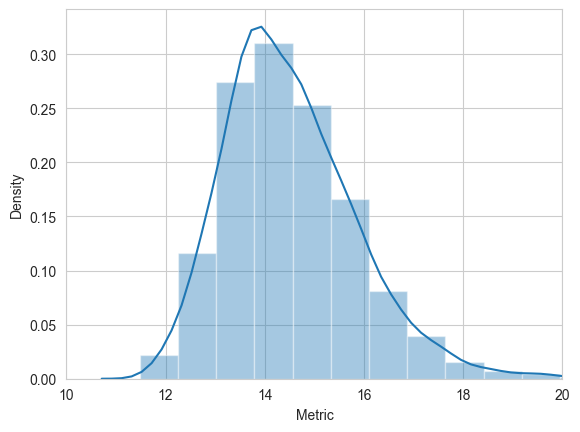

In [1338]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(women_100m_dash_all['Metric'], ax=ax)
ax.set_xlim(10, 20)
#ax.set_ylim(0, 1.5)
plt.show()

In [1341]:
Women_Triple_Jump_all=consolidated[(consolidated['Event']=='Women Triple Jump')].copy()

In [1342]:
Women_Triple_Jump_all.reset_index(drop=True)

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,835.0,2022-01-23 00:00:00,Women Triple Jump,"TAN, TSE TENG",20,Nanyang Tec,11.4,1.1,SA - National Championships,2002,-,11.40
1,836.0,2022-01-23 00:00:00,Women Triple Jump,"TAN, JURNUS",18,Wings Athleti,11.2,0,SA - National Championships,2004,-,11.20
2,837.0,2022-01-23 00:00:00,Women Triple Jump,"CHANDRU, BHAVIKA",18,Singapore Sp,10.77,1.7,SA - National Championships,2004,-,10.77
3,838.0,2022-01-23 00:00:00,Women Triple Jump,"NG, JING NI",18,Singapore Sp,10.5,0.2,SA - National Championships,2004,-,10.50
4,839.0,2022-01-23 00:00:00,Women Triple Jump,"TAN, CHLOE",18,Singapore Sp,10.06,0,SA - National Championships,2004,-,10.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1321,8037.0,2013-04-15 00:00:00,Women Triple Jump,Kwok Jean Ee Daphne,-,CG,9.27,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.27
1322,8038.0,2013-03-03 00:00:00,Women Triple Jump,"Tan, Jessica",18,Victoria Junior College,9.25,4,SA - U18 U20 C'ships,1995,"Finals, Choa Chu Kang Stadium, -",9.25
1323,8039.0,2013-04-15 00:00:00,Women Triple Jump,Joline Aw Juan Lin,-,SNG,9.11,NWI,Local - National Schools,-,"Final, Choa Chu Kang Stadium, -",9.11
1324,8040.0,2013-11-23 00:00:00,Women Triple Jump,"Binte Ridwan, Siti Sofiah",-,Singapore Polytechnic,8.92,0,Local - POL-ITE,-,"Flight 1, Nanyang Poly, -",8.92


In [1343]:
Women_Triple_Jump_all.describe()

,index,Metric
count,1172.000000,1326.000000
mean,8984.397611,9.909306
std,3798.331851,1.055224
min,6.000000,4.020000
25%,7978.750000,9.392500
50%,9933.500000,10.020000
75%,12385.250000,10.560000
max,14805.000000,12.540000


/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


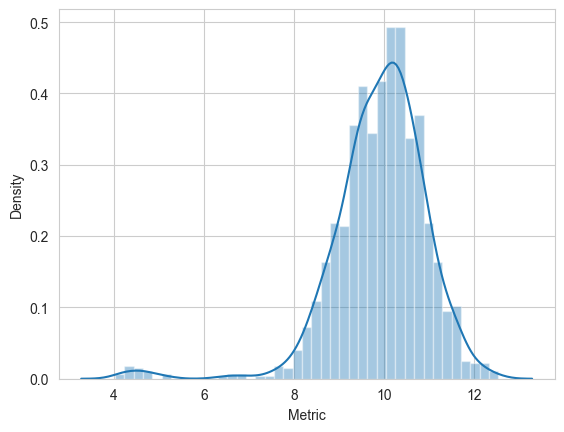

In [1346]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(Women_Triple_Jump_all['Metric'], ax=ax)
#ax.set_xlim(10, 20)
#ax.set_ylim(0, 1.5)
plt.show()

In [1347]:
Men_110m_Hurdles_all=consolidated[(consolidated['Event']=='Men 110 Meter Hurdles (1.067m)')].copy()
Men_110m_Hurdles_all.reset_index(drop=True)

,index,Date,Event,Name,Age,Team,Result,m/s,Competition,Year D.O.B.,"Info, if any",Metric
0,1.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"ANG, Chen Xiang",28,Wings Athletics Club,14.16,0.4,Local - Club Zoom,1994,New NR,14.16
1,2.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"CHONG, Wei Guan",22,National University o,14.55,0.4,Local - Club Zoom,2000,-,14.55
2,3.0,2022-01-15 00:00:00,Men 110 Meter Hurdles (1.067m),"AWYONG, Liang Qi",27,Club ZOOM,14.77,0.4,Local - Club Zoom,1995,-,14.77
3,840.0,2022-01-23 00:00:00,Men 110 Meter Hurdles (1.067m),"ANG, CHEN XIANG",28,Wings Athletics Club,13.97,1.5,SA - National Championships,1994,New NR,13.97
4,841.0,2022-01-23 00:00:00,Men 110 Meter Hurdles (1.067m),"CHONG, WEI GUAN",22,National University S,14.3,1.5,SA - National Championships,2000,New U23R,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...
487,2976.0,2013-01-26 00:00:00,Men 110 Meter Hurdles (1.067m),"Lim, Xuan Ang Angus",18,Ngee Ann Polytechnic,20.94,3,Local - IVP,1995,"Heat, ITE East College (Simei), -",20.94
488,2977.0,2013-01-26 00:00:00,Men 110 Meter Hurdles (1.067m),"Bin Zainal, Syazwan",18,Nanyang Polytechnic,20.99,1.2,Local - IVP,1995,"Heat, ITE East College (Simei), -",20.99
489,2978.0,2013-11-30 00:00:00,Men 110 Meter Hurdles (1.067m),"Sivakumar, Ananthan",-,Singapore Polytechnic,21.26,0,Local - POL-ITE,-,"Section 1, Nanyang Poly, -",21.26
490,2979.0,2013-10-05 00:00:00,Men 110 Meter Hurdles (1.067m),"Bin Zainal, Syazwan",19,Nanyang Polytechnic,21.53,NWI,SA - U23 Open C'ships,1994,"Finals, CCK Stadium, -",21.53


In [1348]:
Men_110m_Hurdles_all.describe()

,index,Metric
count,432.000000,492.000000
mean,6766.527778,17.360041
std,4167.209750,2.712015
min,1.000000,13.940000
25%,2976.000000,15.075000
50%,6734.500000,16.725000
75%,9376.250000,19.037500
max,15117.000000,30.580000


/Users/veesheenyuen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


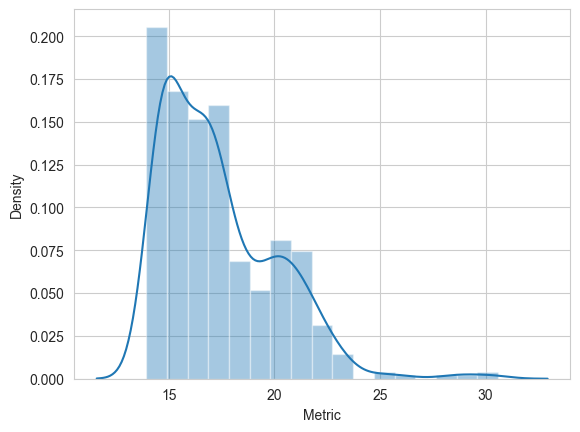

In [1349]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.distplot(Men_110m_Hurdles_all['Metric'], ax=ax)
#ax.set_xlim(10, 20)
#ax.set_ylim(0, 1.5)
plt.show()

In [1350]:
consolidated.to_csv("consolidated.csv")